# Project 1: SAT & ACT Analysis
---

## Problem Statement

As an employee of the College Board, I aim to encourage greater SAT participation in the United States. With two different college exams available, SAT and ACT, we aim to locate, exploit factors that undermine preferences for the SAT test in particular and therefore provide recommendations to increase participation rate in a desired state. **New Mexico** would be the state of choice for investment given its promising potential in accepting SAT as the preferred college admissions exam which would be unravelled in the analysis below. 

## Executive Summary

The study of the participation rates and test results of both SAT and ACT test have unravelled the preferrences behind the selection of either of them as a college entrance exam. 
With a strong inverse correlation between SAT and ACT results as well as state policies that have been found to guide students' choices in their selection, **New Mexico** would be a promising
state to invest in given the lack of a mandated test, a low SAT participation rate and a comparatively lower ACT participation rate than other states. This impressionable education landscape 
has shown a great potential for room of growth in SAT participation rate and we can achieve such a goal through increasing the accessibility of SATs. 

### Contents:
- [2017 Data Import & Cleaning](#2017-Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to `sat_2017_df` and `act_2017_df` respectively

In [96]:
#Opening and reading sat_2017.csv
sat_2017_df = pd.read_csv("../data/sat_2017.csv")

In [97]:
#Opening and reading act_2017.csv
act_2017_df = pd.read_csv("../data/act_2017.csv")

#### 2. Display Data

Print the first 10 rows of `sat_2017.csv` and `act_2017.csv` 

In [102]:
# First 10 rows of sat_2017 data
sat_2017_df.head(10)

State Participation  Evidence-Based Reading and Writing  \
0               Alabama            5%                                 593   
1                Alaska           38%                                 547   
2               Arizona           30%                                 563   
3              Arkansas            3%                                 614   
4            California           53%                                 531   
5              Colorado           11%                                 606   
6           Connecticut          100%                                 530   
7              Delaware          100%                                 503   
8  District of Columbia          100%                                 482   
9               Florida           83%                                 520   

   Math  Total  
0   572   1165  
1   533   1080  
2   553   1116  
3   594   1208  
4   524   1055  
5   595   1201  
6   512   1041  
7   492    996  
8   468    950  
9   497   1017

In [103]:
# First 10 rows of act_2017 data
act_2017_df.head(10)

State Participation  English  Math  Reading  Science  \
0              National           60%     20.3  20.7     21.4     21.0   
1               Alabama          100%     18.9  18.4     19.7     19.4   
2                Alaska           65%     18.7  19.8     20.4     19.9   
3               Arizona           62%     18.6  19.8     20.1     19.8   
4              Arkansas          100%     18.9  19.0     19.7     19.5   
5            California           31%     22.5  22.7     23.1     22.2   
6              Colorado          100%     20.1  20.3     21.2     20.9   
7           Connecticut           31%     25.5  24.6     25.6     24.6   
8              Delaware           18%     24.1  23.4     24.8     23.6   
9  District of Columbia           32%     24.4  23.5     24.9     23.5   

  Composite  
0      21.0  
1      19.2  
2      19.8  
3      19.7  
4      19.4  
5      22.8  
6      20.8  
7      25.2  
8      24.1  
9      24.2

#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

In [104]:
sat_2017_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [105]:
act_2017_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


**Answer**: <br>
The SAT (Scholastic Aptitude Test) data contains average SAT scores from the all states in the US. <br>
- This test is a standardized test commonly used for college admissions in the US and it consists of 3 components: Evidence-Based Reading, Writing and Maths. 
- The scores are then added up and they range between 400 - 1600. However, it is not a mandatory examination therefore participation rates differ between states. 
- We aim to study the correlation between the particapation rates and the average scores obtained in each state.

The ACT data contains average ACT scores across all states in the US. 
- This test shares similar subject components as the SAT test, with an additional science examination. 
- However, the scores of each test ranges from 1-36 instead and several states have made it mandatory to take the ACT exam eg Albama, Arkansas etc. 
- The composite score is the overall average and scoring above a score of 21 means that the state is above the 50th percentile.

We aim to study the **inverse correlation** between the **participation rates** and the **average scores** obtained for both tests

#### 4a. Does the data look complete? 

**Answer**: <br>
The data looks complete but several datatypes are not reflective of the true values and the national SAT score is not included 

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

**Answer**: <br>
SAT : 
- Each test: <br>
The minimum possible value for each test is 200 and the maximum possible value is 800 <br>
- Total score: <br>
The minimum possible value for is 400 and the maximum possible value is 1600 <br>

ACT: <br>
- The minimum possible value of each test is 1 and maximum possible value is 36

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [ ]:
#code

#### 5. What are your data types? 
Display the data types of each feature. 

Data types for `sat_2017_df`:

In [75]:
sat_2017_df.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

Data types for `act_2017_df`:

In [76]:
act_2017_df.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

**Incorrrect Data Types:** <br>
- The participation values of both tests should either be floats or integers
- The composite values of the ACT test should either be floats or integers

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
Define function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [106]:
# Function to remove percentage signs and convert them into integers
def remove_percentage_sign(x):
    try:
        x = int(x.replace('%',''))
    except:
        pass
    return x


Applying `remove_percentage_sign(x)` to **Participation** in `sat_2017_df`:

In [160]:
# Applying the new function to each value in the Participation column
sat_2017_df['Participation'] = sat_2017_df['Participation'].apply(remove_percentage_sign)

# Sorting dataframe according to their Participation values in a descending order
sat_2017_df.sort_values('Participation',ascending = False).head()

State  Participation  Evidence-Based Reading and Writing  \
8   District of Columbia            100                                 482   
22              Michigan            100                                 509   
6            Connecticut            100                                 530   
7               Delaware            100                                 503   
29         New Hampshire             96                                 532   

    Math  Total  
8    468    950  
22   495   1005  
6    512   1041  
7    492    996  
29   520   1052

Applying `remove_percentage_sign(x)` to **Participation** in `act_2017_df`:

In [154]:
# Applying the new function to each value in the Participation column
act_2017_df['Participation'] = act_2017_df['Participation'].apply(remove_percentage_sign)

# Sorting dataframe according to their Participation values in a descending order
act_2017_df.sort_values('Participation',ascending = False).head()

State  Participation  English  Math  Reading  Science Composite
26   Missouri            100     19.8  19.9     20.8     20.5      20.4
18   Kentucky            100     19.6  19.4     20.5     20.1      20.0
50  Wisconsin            100     19.7  20.4     20.6     20.9      20.5
45       Utah            100     19.5  19.9     20.8     20.6      20.3
43  Tennessee            100     19.5  19.2     20.1     19.9      19.8

In [109]:
# Function to converting composite values to floats, else return null
def to_float(x):
    try:
        x = float(x)
    except:
        x = np.nan
    return x
    

Applying `to_float(x)` to **Composite** in `act_2017_df`:

In [155]:
act_2017_df['Composite'] = act_2017_df['Composite'].apply(to_float)

#### Individual values preventing other columns from being the appropriate type:

In [156]:
# Checking for null values:
act_2017_df[act_2017_df['Composite'].isnull()]

State  Participation  English  Math  Reading  Science  Composite
51  Wyoming            100     19.4  19.8     20.8     20.6        NaN

Wyoming has an incorrect composite score which has to be altered

In [157]:
# Changing composite score in Wyoming based on the original data
act_2017_df.loc[51, 'Composite'] = 20.2

**Findings from checking scores that fall outside the accepted range for each subject:**

In [47]:
# Checking to see if any SAT score of test fall within expected range
sat_condition_test = sat_2017_df['Math'].between(200,800)
print(sat_2017_df[~sat_condition_test])

       State Participation  Evidence-Based Reading and Writing  Math  Total
20  Maryland           69%                                 536    52   1060


The average Math score of **Maryland** is **incorrect** as it falls below the minimum of 200

#### Displaying the data types again to confirm they are correct:

In [162]:
sat_2017_df.dtypes

State                                 object
Participation                          int64
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [163]:
act_2017_df.dtypes

State             object
Participation      int64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

Renaming columns in `sat_2017_df`:

In [53]:
sat_2017_df.rename(columns = {'State':'state',
                              'Participation': 'sat_participation_2017',
                              'Evidence-Based Reading and Writing': 'sat_evidence_based_reading_and_writing_2017',
                              'Math':'sat_math_2017',
                              'Total':'sat_total_2017'}, inplace = True
                  )
sat_2017_df.head()

state sat_participation_2017  \
0     Alabama                     5%   
1      Alaska                    38%   
2     Arizona                    30%   
3    Arkansas                     3%   
4  California                    53%   

   sat_evidence_based_reading_and_writing_2017  sat_math_2017  sat_total_2017  
0                                          593            572            1165  
1                                          547            533            1080  
2                                          563            553            1116  
3                                          614            594            1208  
4                                          531            524            1055

Renaming columns in `act_2017_df`:


In [54]:
act_2017_df.rename(columns = {'State':'state',
                              'Participation': 'act_participation_2017',
                              'English': 'act_english_2017',
                              'Math':'act_math_2017',
                              'Reading':'act_reading_2017',
                              'Science': 'act_science_2017',
                              'Composite': 'act_composite_2017'}, inplace = True
                  )
act_2017_df.head()

state act_participation_2017  act_english_2017  act_math_2017  \
0  National                    60%              20.3           20.7   
1   Alabama                   100%              18.9           18.4   
2    Alaska                    65%              18.7           19.8   
3   Arizona                    62%              18.6           19.8   
4  Arkansas                   100%              18.9           19.0   

   act_reading_2017  act_science_2017 act_composite_2017  
0              21.4              21.0               21.0  
1              19.7              19.4               19.2  
2              20.4              19.9               19.8  
3              20.1              19.8               19.7  
4              19.7              19.5               19.4

In [167]:
sat_2017_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   state_2017                                   51 non-null     object
 1   sat_participation_2017                       51 non-null     int64 
 2   sat_evidence_based_reading_and_writing_2017  51 non-null     int64 
 3   sat_math_2017                                51 non-null     int64 
 4   sat_total_2017                               51 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 2.1+ KB


#### Data dictonary for `sat_2017_df`: <br>
|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|*object*|SAT_2017|State in US| 
|sat_participation_2017|*int*|SAT_2017|Percentage of participation(units in %)| 
|sat_evidence_based_reading_and_writing_2017|*int*|SAT_2017|Average score for evidence based reading and writing (range between 200 - 800)| 
|sat_math_2017|*int*|SAT_2017|Average score for math (range between 200 - 800)| 
|sat_total_2017|*int*|SAT_2017|Average total score (range between 400 - 1600)|

In [200]:
act_2017_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 1 to 51
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   51 non-null     object 
 1   act_participation_2017  51 non-null     int64  
 2   act_english_2017        51 non-null     float64
 3   act_math_2017           51 non-null     float64
 4   act_reading_2017        51 non-null     float64
 5   act_science_2017        51 non-null     float64
 6   act_composite_2017      51 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 3.2+ KB


#### Data dictionary for `act_2017_df`: 
|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|*object*|ACT_2017|State in US| 
|act_participation_2017|*int*|ACT_2017|Percentage of participation(units in %)| 
|act_english_2017|*int*|ACT_2017|Average score for english (range between 1 - 36)| 
|act_math_2017|*int*|ACT_2017|Average score for math (range between 1 - 36)| 
|act_reading_2017|*int*|ACT_2017|Average score for reading (range between 1 - 36)|
|act_science_2017|*int*|ACT_2017|Average score for science (range between 1 - 36)|
|act_composite_2017|*int*|ACT_2017|Average score for science (range between 1 - 36)|

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [57]:
# Dropping the row with state_2017 = National 
act_2017_df.drop(act_2017_df[(act_2017_df['state'] == 'National')].index,inplace = True)
act_2017_df.head()

state act_participation_2017  act_english_2017  act_math_2017  \
1     Alabama                   100%              18.9           18.4   
2      Alaska                    65%              18.7           19.8   
3     Arizona                    62%              18.6           19.8   
4    Arkansas                   100%              18.9           19.0   
5  California                    31%              22.5           22.7   

   act_reading_2017  act_science_2017 act_composite_2017  
1              19.7              19.4               19.2  
2              20.4              19.9               19.8  
3              20.1              19.8               19.7  
4              19.7              19.5               19.4  
5              23.1              22.2               22.8

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [59]:
# Merging sat and act dataframes:
combined_2017 = pd.merge(sat_2017_df,act_2017_df,how = 'left')
combined_2017.head()

state sat_participation_2017  \
0     Alabama                     5%   
1      Alaska                    38%   
2     Arizona                    30%   
3    Arkansas                     3%   
4  California                    53%   

   sat_evidence_based_reading_and_writing_2017  sat_math_2017  sat_total_2017  \
0                                          593            572            1165   
1                                          547            533            1080   
2                                          563            553            1116   
3                                          614            594            1208   
4                                          531            524            1055   

  act_participation_2017  act_english_2017  act_math_2017  act_reading_2017  \
0                   100%              18.9           18.4              19.7   
1                    65%              18.7           19.8              20.4   
2                    62%              18.6           19.8              20.1   
3                   100%              18.9           19.0              19.7   
4                    31%              22.5           22.7              23.1   

   act_science_2017 act_composite_2017  
0              19.4               19.2  
1              19.9               19.8  
2              19.8               19.7  
3              19.5               19.4  
4              22.2               22.8

#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [205]:
# Saving merged dataframe in csv format
combined_2017.to_csv('../data/combined_2017.csv', index=False)

## 2018 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2018.csv` and `act_2018_updated.csv` files and assign them to appropriately named pandas dataframes.

In [61]:
# Opening and reading sat_2018.csv
sat_2018_df = pd.read_csv("../data/sat_2018.csv")

In [60]:
# Opening and reading sat_2018.csv
act_2018_df = pd.read_csv("../data/act_2018_updated.csv")

#### 2. Display Data

Print the first 10 rows of `sat_2018_df`:

In [129]:
sat_2018_df.head(10)

State Participation  Evidence-Based Reading and Writing  \
0               Alabama            6%                                 595   
1                Alaska           43%                                 562   
2               Arizona           29%                                 577   
3              Arkansas            5%                                 592   
4            California           60%                                 540   
5              Colorado          100%                                 519   
6           Connecticut          100%                                 535   
7              Delaware          100%                                 505   
8  District of Columbia           92%                                 497   
9               Florida           56%                                 550   

   Math  Total  
0   571   1166  
1   544   1106  
2   572   1149  
3   576   1169  
4   536   1076  
5   506   1025  
6   519   1053  
7   492    998  
8   480    977  
9   549   1099

Print the first 10 rows of `act_2018_df`:

In [130]:
act_2018_df.head(10)

State  Percentage of Students Tested  \
0               Alabama                            100   
1                Alaska                             33   
2               Arizona                             66   
3              Arkansas                            100   
4            California                             27   
5              Colorado                             30   
6           Connecticut                             26   
7              Delaware                             17   
8  District of Columbia                             32   
9               Florida                             66   

   Average Composite Score  Average English Score  Average Math Score  \
0                     19.1                   18.9                18.3   
1                     20.8                   19.8                20.6   
2                     19.2                   18.2                19.4   
3                     19.4                   19.1                18.9   
4                     22.7                   22.5                22.5   
5                     23.9                   23.9                23.2   
6                     25.6                   26.0                24.8   
7                     23.2                   23.7                23.1   
8                     23.6                   23.7                22.7   
9                     19.9                   19.2                19.3   

   Average Reading Score  Average Science Score  
0                   19.6                   19.0  
1                   21.6                   20.7  
2                   19.5                   19.2  
3                   19.7                   19.4  
4                   23.0                   22.1  
5                   24.4                   23.5  
6                   26.1                   24.9  
7                   24.5                   23.4  
8                   24.4                   23.0  
9                   21.1                   19.5

Print the data types of features in `sat_2018_df`:

In [131]:
sat_2018_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


Print the data types of features in `act_2018_df`:

In [132]:
act_2018_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          51 non-null     object 
 1   Percentage of Students Tested  51 non-null     int64  
 2   Average Composite Score        51 non-null     float64
 3   Average English Score          51 non-null     float64
 4   Average Math Score             51 non-null     float64
 5   Average Reading Score          51 non-null     float64
 6   Average Science Score          51 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.9+ KB


**Incorrrect Data Types:** <br>
- The participation values for SAT should either be floats or integers


#### 5. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Re-using the `remove_percentage_sign` function to convert participation rates into integers

In [186]:
# Applying the new function to each value in the Participation column
sat_2018_df['Participation'] = sat_2018_df['Participation'].apply(remove_percentage_sign)

# Sorting dataframe according to their Participation values in a descending order
sat_2018_df.sort_values('Participation',ascending = False).head()

State  Participation  Evidence-Based Reading and Writing  Math  \
5      Colorado            100                                 519   506   
6   Connecticut            100                                 535   519   
7      Delaware            100                                 505   492   
22     Michigan            100                                 511   499   
12        Idaho            100                                 508   493   

    Total  
5    1025  
6    1053  
7     998  
22   1011  
12   1001

In [187]:
# Checking to see if any SAT score of test fall within expected range
sat_condition_test = sat_2018_df['Math'].between(200,800)
print(sat_2018_df[~sat_condition_test])

# Checking to see if any SAT total scores fall within the expected range
sat_condition_total = sat_2018_df['Total'].between(400,1600)
print(sat_2018_df[~sat_condition_total])

# Checking to see if ACT scores of test fall within expected range
act_condition_test = act_2018_df['Average Composite Score'].between(1,36)
act_2018_df[~act_condition_test]

Empty DataFrame
Columns: [State, Participation, Evidence-Based Reading and Writing, Math, Total]
Index: []
Empty DataFrame
Columns: [State, Participation, Evidence-Based Reading and Writing, Math, Total]
Index: []


Empty DataFrame
Columns: [State, Percentage of Students Tested, Average Composite Score, Average English Score, Average Math Score, Average Reading Score, Average Science Score]
Index: []

- Display the data types again to confirm they are correct.

In [62]:
# Displaying sat_2018 dataframe
sat_2018_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [63]:
# Displaying act_2018 dataframe
act_2018_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          51 non-null     object 
 1   Percentage of Students Tested  51 non-null     int64  
 2   Average Composite Score        51 non-null     float64
 3   Average English Score          51 non-null     float64
 4   Average Math Score             51 non-null     float64
 5   Average Reading Score          51 non-null     float64
 6   Average Science Score          51 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.9+ KB


#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

Renaming columns in `sat_2018_df`:


In [192]:
sat_2018_df.rename(columns = {'State':'state',
                              'Participation': 'sat_participation_2018',
                              'Evidence-Based Reading and Writing': 'sat_evidence_based_reading_and_writing_2018',
                              'Math':'sat_math_2018',
                              'Total':'sat_total_2018'}, inplace = True
                  )
sat_2018_df.head()

state  sat_participation_2018  \
0     Alabama                       6   
1      Alaska                      43   
2     Arizona                      29   
3    Arkansas                       5   
4  California                      60   

   sat_evidence_based_reading_and_writing_2018  sat_math_2018  sat_total_2018  
0                                          595            571            1166  
1                                          562            544            1106  
2                                          577            572            1149  
3                                          592            576            1169  
4                                          540            536            1076

Renaming columns in `act_2018_df`:

In [193]:
act_2018_df.rename(columns = {'State':'state',
                              'Percentage of Students Tested': 'act_participation_2018',
                              'Average English Score': 'act_english_2018',
                              'Average Math Score':'act_math_2018',
                              'Average Reading Score':'act_reading_2018',
                              'Average Science Score': 'act_science_2018',
                              'Average Composite Score': 'act_composite_2018'}, inplace = True
                  )

In [206]:
act_2018_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   51 non-null     object 
 1   act_participation_2018  51 non-null     int64  
 2   act_composite_2018      51 non-null     float64
 3   act_english_2018        51 non-null     float64
 4   act_math_2018           51 non-null     float64
 5   act_reading_2018        51 non-null     float64
 6   act_science_2018        51 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.9+ KB


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

#### Data dictonary for `sat_2018_df`:
|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|*object*|SAT_2018|State in US| 
|sat_participation_2018|*int*|SAT_2018|Percentage of participation(units in %)| 
|sat_evidence_based_reading_and_writing_2018|*int*|SAT_2018|Average score for evidence based reading and writing (range between 200 - 800)| 
|sat_math_2018|*int*|SAT_2018|Average score for math (range between 200 - 800)| 
|sat_total_2018|*int*|SAT_2018|Average total score (range between 400 - 1600)|

#### Data dictonary for `act_2018_df`: 
|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|*object*|ACT_2018|State in US| 
|act_participation_2018|*int*|ACT_2018|Percentage of participation(units in %)| 
|act_english_2018|*int*|ACT_2018|Average score for english (range between 1 - 36)| 
|act_math_2018|*int*|ACT_2018|Average score for math (range between 1 - 36)| 
|act_reading_2018|*int*|ACT_2018|Average score for reading (range between 1 - 36)|
|act_science_2018|*int*|ACT_2018|Average score for science (range between 1 - 36)|
|act_composite_2018|*int*|ACT_2018|Average score for science (range between 1 - 36)|

#### 9. Merge Dataframes

Join the 2018 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [209]:
# Merging sat and act dataframes:
combined_2018 = pd.merge(sat_2018_df,act_2018_df,how = 'left')
combined_2018.head()

state  sat_participation_2018  \
0     Alabama                       6   
1      Alaska                      43   
2     Arizona                      29   
3    Arkansas                       5   
4  California                      60   

   sat_evidence_based_reading_and_writing_2018  sat_math_2018  sat_total_2018  \
0                                          595            571            1166   
1                                          562            544            1106   
2                                          577            572            1149   
3                                          592            576            1169   
4                                          540            536            1076   

   act_participation_2018  act_composite_2018  act_english_2018  \
0                     100                19.1              18.9   
1                      33                20.8              19.8   
2                      66                19.2              18.2   
3                     100                19.4              19.1   
4                      27                22.7              22.5   

   act_math_2018  act_reading_2018  act_science_2018  
0           18.3              19.6              19.0  
1           20.6              21.6              20.7  
2           19.4              19.5              19.2  
3           18.9              19.7              19.4  
4           22.5              23.0              22.1

#### 10. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2018.csv`.

In [210]:
combined_2018.to_csv('../data/combined_2018.csv', index=False)

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [212]:
final = pd.merge(combined_2017,combined_2018, how = 'left')
final.to_csv('../data/final.csv', index=False)

#### Data dictonary for `final`: 
|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|*object*|SAT_2017|State in US| 
|sat_participation_2017|*int*|sat_2017.csv|Percentage of participation(units in %)| 
|sat_evidence_based_reading_and_writing_2018|*int*|sat_2017.csv|Average score for evidence based reading and writing (range between 200 - 800)| 
|sat_math_2017|*int*|sat_2017.csv|Average score for math (range between 200 - 800)| 
|sat_total_2017|*int*|sat_2017.csv|Average total score (range between 400 - 1600)|
|act_participation_2017|*int*|act_2017.csv|Percentage of participation(units in %)| 
|act_english_2017|*float*|act_2017.csv|Average score for english (range between 1 - 36)| 
|act_math_2017|*float*|act_2017.csv|Average score for math (range between 1 - 36)| 
|act_reading_2017|*float*|act_2017.csv|Average score for reading (range between 1 - 36)|
|act_science_2017|*float*|act_2017.csv|Average score for science (range between 1 - 36)|
|act_composite_2017|*float*|act_2017.csv|Average score for science (range between 1 - 36)|
|act_participation_2018|*int*|act_2018.csv|Percentage of participation(units in %)| 
|act_english_2018|*float*|act_2018.csv|Average score for english (range between 1 - 36)| 
|act_math_2018|*float*|act_2018.csv|Average score for math (range between 1 - 36)| 
|act_reading_2018|*float*|act_2018.csv|Average score for reading (range between 1 - 36)|
|act_science_2018|*float*|act_2018.csv|Average score for science (range between 1 - 36)|
|act_composite_2018|*float*|act_2018.csv|Average score for science (range between 1 - 36)|
|act_participation_2018|*int*|act_2018.csv|Percentage of participation(units in %)| 
|act_english_2018|*float*|act_2018.csv|Average score for english (range between 1 - 36)| 
|act_math_2018|*float*|act_2018.csv|Average score for math (range between 1 - 36)| 
|act_reading_2018|*float*|act_2018.csv|Average score for reading (range between 1 - 36)|
|act_science_2018|*float*|act_2018.csv|Average score for science (range between 1 - 36)|
|act_composite_2018|*float*|act_2018.csv|Average score for science (range between 1 - 36)|

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [3]:
# Opening and reading final.csv
final = pd.read_csv('../data/final.csv')

In [103]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 21 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   state                                        51 non-null     object 
 1   sat_participation_2017                       51 non-null     int64  
 2   sat_evidence_based_reading_and_writing_2017  51 non-null     int64  
 3   sat_math_2017                                51 non-null     int64  
 4   sat_total_2017                               51 non-null     int64  
 5   act_participation_2017                       51 non-null     int64  
 6   act_english_2017                             51 non-null     float64
 7   act_math_2017                                51 non-null     float64
 8   act_reading_2017                             51 non-null     float64
 9   act_science_2017                             51 non-null     float64
 10  act_

In [10]:
# Transposed output of pandas describe method
final.describe().transpose()

count         mean        std  \
sat_participation_2017                        51.0    39.803922  35.276632   
sat_evidence_based_reading_and_writing_2017   51.0   569.117647  45.666901   
sat_math_2017                                 51.0   547.627451  84.909119   
sat_total_2017                                51.0  1126.098039  92.494812   
act_participation_2017                        51.0    65.254902  32.140842   
act_english_2017                              51.0    20.931373   2.353677   
act_math_2017                                 51.0    21.182353   1.981989   
act_reading_2017                              51.0    22.013725   2.067271   
act_science_2017                              51.0    21.041176   3.182463   
act_composite_2017                            51.0    21.519608   2.020695   
sat_participation_2018                        51.0    45.745098  37.314256   
sat_evidence_based_reading_and_writing_2018   51.0   563.686275  47.502627   
sat_math_2018                                 51.0   556.235294  47.772623   
sat_total_2018                                51.0  1120.019608  94.155083   
act_participation_2018                        51.0    61.647059  34.080976   
act_composite_2018                            51.0    21.486275   2.106278   
act_english_2018                              51.0    20.988235   2.446356   
act_math_2018                                 51.0    21.125490   2.035765   
act_reading_2018                              51.0    22.015686   2.167245   
act_science_2018                              51.0    21.345098   1.870114   

                                               min      25%     50%      75%  \
sat_participation_2017                         2.0     4.00    38.0    66.00   
sat_evidence_based_reading_and_writing_2017  482.0   533.50   559.0   613.00   
sat_math_2017                                 52.0   522.00   548.0   599.00   
sat_total_2017                               950.0  1055.50  1107.0  1212.00   
act_participation_2017                         8.0    31.00    69.0   100.00   
act_english_2017                              16.3    19.00    20.7    23.30   
act_math_2017                                 18.0    19.40    20.9    23.10   
act_reading_2017                              18.1    20.45    21.8    24.15   
act_science_2017                               2.3    19.90    21.3    22.75   
act_composite_2017                            17.8    19.80    21.4    23.60   
sat_participation_2018                         2.0     4.50    52.0    77.50   
sat_evidence_based_reading_and_writing_2018  480.0   534.50   552.0   610.50   
sat_math_2018                                480.0   522.50   544.0   593.50   
sat_total_2018                               977.0  1057.50  1098.0  1204.00   
act_participation_2018                         7.0    28.50    66.0   100.00   
act_composite_2018                            17.7    19.95    21.3    23.55   
act_english_2018                              16.6    19.10    20.2    23.70   
act_math_2018                                 17.8    19.40    20.7    23.15   
act_reading_2018                              18.0    20.45    21.6    24.10   
act_science_2018                              17.9    19.85    21.1    23.05   

                                                max  
sat_participation_2017                        100.0  
sat_evidence_based_reading_and_writing_2017   644.0  
sat_math_2017                                 651.0  
sat_total_2017                               1295.0  
act_participation_2017                        100.0  
act_english_2017                               25.5  
act_math_2017                                  25.3  
act_reading_2017                               26.0  
act_science_2017                               24.9  
act_composite_2017                             25.5  
sat_participation_2018                        100.0  
sat_evidence_based_reading_and_writing_2018   643.0  
sat_math_2018          

#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [21]:
# Function to calculate standard deviation
from math import sqrt
def standard_deviation(alist):
    mean = sum(alist)/len(alist)
    variance = sum((x - mean)**2 for x in alist)/len(alist)
    sd = sqrt(variance)
    return sd
    

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [24]:
# Using dictionary comprehension and applying standard deviation to each column
columns = final.columns[1:]
sd = {column:standard_deviation(final[column]) for column in columns}
sd

{'sat_participation_2017': 34.92907076664508,
 'sat_evidence_based_reading_and_writing_2017': 45.21697020437866,
 'sat_math_2017': 84.07255521608297,
 'sat_total_2017': 91.58351056778743,
 'act_participation_2017': 31.824175751231806,
 'act_english_2017': 2.3304876369363363,
 'act_math_2017': 1.9624620273436781,
 'act_reading_2017': 2.0469029314842646,
 'act_science_2017': 3.151107895464408,
 'act_composite_2017': 2.000786081581989,
 'sat_participation_2018': 36.946619223539415,
 'sat_evidence_based_reading_and_writing_2018': 47.03460978357609,
 'sat_math_2018': 47.30194550378352,
 'sat_total_2018': 93.22742384464433,
 'act_participation_2018': 33.745194881997506,
 'act_composite_2018': 2.0855261815801147,
 'act_english_2018': 2.4222536143202795,
 'act_math_2018': 2.015707255555717,
 'act_reading_2018': 2.145891884510421,
 'act_science_2018': 1.8516885484833543}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

In [73]:
# Applying inbuilt np.std() to each column
np_sd = {column:np.std(final[column]) for column in columns}
np_sd

{'sat_participation_2017': 34.92907076664508,
 'sat_evidence_based_reading_and_writing_2017': 45.21697020437866,
 'sat_math_2017': 84.07255521608297,
 'sat_total_2017': 91.58351056778743,
 'act_participation_2017': 31.824175751231806,
 'act_english_2017': 2.3304876369363363,
 'act_math_2017': 1.9624620273436781,
 'act_reading_2017': 2.0469029314842646,
 'act_science_2017': 3.151107895464408,
 'act_composite_2017': 2.000786081581989,
 'sat_participation_2018': 36.946619223539415,
 'sat_evidence_based_reading_and_writing_2018': 47.03460978357609,
 'sat_math_2018': 47.30194550378352,
 'sat_total_2018': 93.22742384464433,
 'act_participation_2018': 33.745194881997506,
 'act_composite_2018': 2.0855261815801147,
 'act_english_2018': 2.4222536143202795,
 'act_math_2018': 2.015707255555717,
 'act_reading_2018': 2.145891884510421,
 'act_science_2018': 1.8516885484833543}

**Answer:** <br>
The manually calculated standard deviations are identical to the standard deviations calculated using numpy's `std` method. 
The standard deviations generated by `final.describe()` are slightly higher 

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

In [106]:
# States with the highest 2017 SAT participation rate:
final.loc[final['sat_participation_2017'] == final['sat_participation_2017'].max()]

state  sat_participation_2017  \
6            Connecticut                     100   
7               Delaware                     100   
8   District of Columbia                     100   
22              Michigan                     100   

    sat_evidence_based_reading_and_writing_2017  sat_math_2017  \
6                                           530            512   
7                                           503            492   
8                                           482            468   
22                                          509            495   

    sat_total_2017  act_participation_2017  act_english_2017  act_math_2017  \
6             1041                      31              25.5           24.6   
7              996                      18              24.1           23.4   
8              950                      32              24.4           23.5   
22            1005                      29              24.1           23.7   

    act_reading_2017  act_science_2017  ...  sat_participation_2018  \
6               25.6              24.6  ...                     100   
7               24.8              23.6  ...                     100   
8               24.9              23.5  ...                      92   
22              24.5              23.8  ...                     100   

    sat_evidence_based_reading_and_writing_2018  sat_math_2018  \
6                                           535            519   
7                                           505            492   
8                                           497            480   
22                                          511            499   

    sat_total_2018  act_participation_2018  act_composite_2018  \
6             1053                      26                25.6   
7              998                      17                23.2   
8              977                      32                23.6   
22            1011                      22                24.4   

    act_english_2018  act_math_2018  act_reading_2018  act_science_2018  
6               26.0           24.8              26.1              24.9  
7               23.7           23.1              24.5              23.4  
8               23.7           22.7              24.4              23.0  
22              24.5           23.9              24.7              23.9  

[4 rows x 21 columns]

These states that 100% SAT participation rates in 2017 have low ACT participation rates in 2017
 - Connecticut, Delaware and Michigan have made it compulsory to take the SAT test which could account for the high participation rates
 - In District of Columbia, although it is not compulsory, the SAT test is free for all juniors and seniors

In [105]:
# States with the lowest 2017 SAT participation rate:
final.loc[final['sat_participation_2017'] == final['sat_participation_2017'].min()]


state  sat_participation_2017  \
15          Iowa                       2   
24   Mississippi                       2   
34  North Dakota                       2   

    sat_evidence_based_reading_and_writing_2017  sat_math_2017  \
15                                          641            635   
24                                          634            607   
34                                          635            621   

    sat_total_2017  act_participation_2017  act_english_2017  act_math_2017  \
15            1275                      67              21.2           21.3   
24            1242                     100              18.2           18.1   
34            1256                      98              19.0           20.4   

    act_reading_2017  act_science_2017  ...  sat_participation_2018  \
15              22.6              22.1  ...                       3   
24              18.8              18.8  ...                       3   
34              20.5              20.6  ...                       2   

    sat_evidence_based_reading_and_writing_2018  sat_math_2018  \
15                                          634            631   
24                                          630            606   
34                                          640            643   

    sat_total_2018  act_participation_2018  act_composite_2018  \
15            1265                      68                21.8   
24            1236                     100                18.6   
34            1283                      98                20.3   

    act_english_2018  act_math_2018  act_reading_2018  act_science_2018  
15              21.0           21.2              22.5              22.0  
24              18.2           18.1              18.9              18.6  
34              19.1           20.3              20.7              20.5  

[3 rows x 21 columns]

These states only have 2% SAT participation rates but very high ACT participation rates in 2017. 
Mississppi and North Dakota require all students to take the ACT test and therefore has high ACT participation rates in both years

In [107]:
# States with the highest 2018 SAT participation rate:
final.loc[final['sat_participation_2018'] == final['sat_participation_2018'].max()]


state  sat_participation_2017  \
5      Colorado                      11   
6   Connecticut                     100   
7      Delaware                     100   
12        Idaho                      93   
22     Michigan                     100   

    sat_evidence_based_reading_and_writing_2017  sat_math_2017  \
5                                           606            595   
6                                           530            512   
7                                           503            492   
12                                          513            493   
22                                          509            495   

    sat_total_2017  act_participation_2017  act_english_2017  act_math_2017  \
5             1201                     100              20.1           20.3   
6             1041                      31              25.5           24.6   
7              996                      18              24.1           23.4   
12            1005                      38              21.9           21.8   
22            1005                      29              24.1           23.7   

    act_reading_2017  act_science_2017  ...  sat_participation_2018  \
5               21.2              20.9  ...                     100   
6               25.6              24.6  ...                     100   
7               24.8              23.6  ...                     100   
12              23.0              22.1  ...                     100   
22              24.5              23.8  ...                     100   

    sat_evidence_based_reading_and_writing_2018  sat_math_2018  \
5                                           519            506   
6                                           535            519   
7                                           505            492   
12                                          508            493   
22                                          511            499   

    sat_total_2018  act_participation_2018  act_composite_2018  \
5             1025                      30                23.9   
6             1053                      26                25.6   
7              998                      17                23.2   
12            1001                      36                22.3   
22            1011                      22                24.4   

    act_english_2018  act_math_2018  act_reading_2018  act_science_2018  
5               23.9           23.2              24.4              23.5  
6               26.0           24.8              26.1              24.9  
7               23.7           23.1              24.5              23.4  
12              21.9           21.6              23.2              22.1  
22              24.5           23.9              24.7              23.9  

[5 rows x 21 columns]

States with high 2017 participation tend to have high 2018 participation except for Colorado.
Idaho has higher SAT participation rates than ACT even though the state does not mandate any test as they offer the SAT through the School Day Test and therefore is free of charge.

In [108]:
# States with the lowest 2018 SAT participation rate:
final.loc[final['sat_participation_2018'] == final['sat_participation_2018'].min()]


state  sat_participation_2017  \
34  North Dakota                       2   

    sat_evidence_based_reading_and_writing_2017  sat_math_2017  \
34                                          635            621   

    sat_total_2017  act_participation_2017  act_english_2017  act_math_2017  \
34            1256                      98              19.0           20.4   

    act_reading_2017  act_science_2017  ...  sat_participation_2018  \
34              20.5              20.6  ...                       2   

    sat_evidence_based_reading_and_writing_2018  sat_math_2018  \
34                                          640            643   

    sat_total_2018  act_participation_2018  act_composite_2018  \
34            1283                      98                20.3   

    act_english_2018  act_math_2018  act_reading_2018  act_science_2018  
34              19.1           20.3              20.7              20.5  

[1 rows x 21 columns]

North Dakota continued to have low SAT participation rate but very high ACT participation rates for 2017 and 2018 as the state requires all students to take ACT

In [163]:
# States with the highest 2017 ACT participation rate:
final.loc[final['act_participation_2017'] == final['act_participation_2017'].max()].head()

state  sat_participation_2017  \
0     Alabama                       5   
3    Arkansas                       3   
5    Colorado                      11   
17   Kentucky                       4   
18  Louisiana                       4   

    sat_evidence_based_reading_and_writing_2017  sat_math_2017  \
0                                           593            572   
3                                           614            594   
5                                           606            595   
17                                          631            616   
18                                          611            586   

    sat_total_2017  act_participation_2017  act_english_2017  act_math_2017  \
0             1165                     100              18.9           18.4   
3             1208                     100              18.9           19.0   
5             1201                     100              20.1           20.3   
17            1247                     100              19.6           19.4   
18            1198                     100              19.4           18.8   

    act_reading_2017  act_science_2017  ...  sat_participation_2018  \
0               19.7              19.4  ...                       6   
3               19.7              19.5  ...                       5   
5               21.2              20.9  ...                     100   
17              20.5              20.1  ...                       4   
18              19.8              19.6  ...                       4   

    sat_evidence_based_reading_and_writing_2018  sat_math_2018  \
0                                           595            571   
3                                           592            576   
5                                           519            506   
17                                          630            618   
18                                          615            595   

    sat_total_2018  act_participation_2018  act_composite_2018  \
0             1166                     100                19.1   
3             1169                     100                19.4   
5             1025                      30                23.9   
17            1248                     100                20.2   
18            1210                     100                19.2   

    act_english_2018  act_math_2018  act_reading_2018  act_science_2018  
0               18.9           18.3              19.6              19.0  
3               19.1           18.9              19.7              19.4  
5               23.9           23.2              24.4              23.5  
17              19.9           19.7              20.8              20.1  
18              19.0           18.5              19.6              19.1  

[5 rows x 21 columns]

Trend is consistent with the finding above whereby there is an inverse trend between ACT and SAT participation for both years
- Moreover, this trend is consistent in Colorado where a switch of SAT to ACT can be seen

In [110]:
# States with the lowest 2017 ACT participation rate:
final.loc[final['act_participation_2017'] == final['act_participation_2017'].min()]

state  sat_participation_2017  \
19  Maine                      95   

    sat_evidence_based_reading_and_writing_2017  sat_math_2017  \
19                                          513            499   

    sat_total_2017  act_participation_2017  act_english_2017  act_math_2017  \
19            1012                       8              24.2           24.0   

    act_reading_2017  act_science_2017  ...  sat_participation_2018  \
19              24.8              23.7  ...                      99   

    sat_evidence_based_reading_and_writing_2018  sat_math_2018  \
19                                          512            501   

    sat_total_2018  act_participation_2018  act_composite_2018  \
19            1013                       7                24.0   

    act_english_2018  act_math_2018  act_reading_2018  act_science_2018  
19              23.8           23.6              24.7              23.4  

[1 rows x 21 columns]

The inverse trend is highlighted in Maine as well. In addition, even though SAT is optional, the state of Maine offers **free** SAT to the juniors which could account for the high participation rate

In [122]:
# States with the highest 2018 ACT participation rate:
final.loc[final['act_participation_2018'] == final['act_participation_2018'].max()].head()

state  sat_participation_2017  \
0       Alabama                       5   
3      Arkansas                       3   
17     Kentucky                       4   
18    Louisiana                       4   
24  Mississippi                       2   

    sat_evidence_based_reading_and_writing_2017  sat_math_2017  \
0                                           593            572   
3                                           614            594   
17                                          631            616   
18                                          611            586   
24                                          634            607   

    sat_total_2017  act_participation_2017  act_english_2017  act_math_2017  \
0             1165                     100              18.9           18.4   
3             1208                     100              18.9           19.0   
17            1247                     100              19.6           19.4   
18            1198                     100              19.4           18.8   
24            1242                     100              18.2           18.1   

    act_reading_2017  act_science_2017  ...  sat_participation_2018  \
0               19.7              19.4  ...                       6   
3               19.7              19.5  ...                       5   
17              20.5              20.1  ...                       4   
18              19.8              19.6  ...                       4   
24              18.8              18.8  ...                       3   

    sat_evidence_based_reading_and_writing_2018  sat_math_2018  \
0                                           595            571   
3                                           592            576   
17                                          630            618   
18                                          615            595   
24                                          630            606   

    sat_total_2018  act_participation_2018  act_composite_2018  \
0             1166                     100                19.1   
3             1169                     100                19.4   
17            1248                     100                20.2   
18            1210                     100                19.2   
24            1236                     100                18.6   

    act_english_2018  act_math_2018  act_reading_2018  act_science_2018  
0               18.9           18.3              19.6              19.0  
3               19.1           18.9              19.7              19.4  
17              19.9           19.7              20.8              20.1  
18              19.0           18.5              19.6              19.1  
24              18.2           18.1              18.9              18.6  

[5 rows x 21 columns]

In [140]:
# State(s)with the lowest 2018 ACT participation rate:
final['state'].loc[final['act_participation_2018'] == final['act_participation_2018'].min()]

# Maine continued to have low ACT participation

19    Maine
Name: state, dtype: object

Maine continued to have low ACT participation due to the option of free SAT test.

#### Findings from participation rates:
- 1) An inverse trend exists between SAT and ACT participation regardless of the years
    - Besides anamolies such as Colorado, this trend is consistent going from 2017 to 2018

In [112]:
# State(s) with the highest 2017 SAT mean total score:
final.loc[final['sat_total_2017'] == final['sat_total_2017'].max()]

state  sat_participation_2017  \
23  Minnesota                       3   

    sat_evidence_based_reading_and_writing_2017  sat_math_2017  \
23                                          644            651   

    sat_total_2017  act_participation_2017  act_english_2017  act_math_2017  \
23            1295                     100              20.4           21.5   

    act_reading_2017  act_science_2017  ...  sat_participation_2018  \
23              21.8              21.6  ...                       4   

    sat_evidence_based_reading_and_writing_2018  sat_math_2018  \
23                                          643            655   

    sat_total_2018  act_participation_2018  act_composite_2018  \
23            1298                      99                21.3   

    act_english_2018  act_math_2018  act_reading_2018  act_science_2018  
23              20.2           21.4              21.7              21.4  

[1 rows x 21 columns]

For both years, Minnesota has very high average SAT total scores but low SAT participation rates 
- Inverse trend between SAT and ACT participation rate is shown here too
- Moreover, the state does not mandate any particular test

In [113]:
# State(s) with the lowest 2017 SAT mean total score:
final.loc[final['sat_total_2017'] == final['sat_total_2017'].min()]


state  sat_participation_2017  \
8  District of Columbia                     100   

   sat_evidence_based_reading_and_writing_2017  sat_math_2017  sat_total_2017  \
8                                          482            468             950   

   act_participation_2017  act_english_2017  act_math_2017  act_reading_2017  \
8                      32              24.4           23.5              24.9   

   act_science_2017  ...  sat_participation_2018  \
8              23.5  ...                      92   

   sat_evidence_based_reading_and_writing_2018  sat_math_2018  sat_total_2018  \
8                                          497            480             977   

   act_participation_2018  act_composite_2018  act_english_2018  \
8                      32                23.6              23.7   

   act_math_2018  act_reading_2018  act_science_2018  
8           22.7              24.4              23.0  

[1 rows x 21 columns]

District of Columbia has the very low average SAT total score but high participation rates
- Inverse trend between SAT and ACT participation rate is shown here too

In [114]:
# State(s) with the highest 2018 SAT mean total score:
final.loc[final['sat_total_2018'] == final['sat_total_2018'].max()]

state  sat_participation_2017  \
23  Minnesota                       3   

    sat_evidence_based_reading_and_writing_2017  sat_math_2017  \
23                                          644            651   

    sat_total_2017  act_participation_2017  act_english_2017  act_math_2017  \
23            1295                     100              20.4           21.5   

    act_reading_2017  act_science_2017  ...  sat_participation_2018  \
23              21.8              21.6  ...                       4   

    sat_evidence_based_reading_and_writing_2018  sat_math_2018  \
23                                          643            655   

    sat_total_2018  act_participation_2018  act_composite_2018  \
23            1298                      99                21.3   

    act_english_2018  act_math_2018  act_reading_2018  act_science_2018  
23              20.2           21.4              21.7              21.4  

[1 rows x 21 columns]

Minnesota continued to have high average SAT total score but low SAT participation rates

In [115]:
# State(s) with the lowest 2018 SAT mean total score:
final.loc[final['sat_total_2018'] == final['sat_total_2018'].min()]

state  sat_participation_2017  \
8  District of Columbia                     100   

   sat_evidence_based_reading_and_writing_2017  sat_math_2017  sat_total_2017  \
8                                          482            468             950   

   act_participation_2017  act_english_2017  act_math_2017  act_reading_2017  \
8                      32              24.4           23.5              24.9   

   act_science_2017  ...  sat_participation_2018  \
8              23.5  ...                      92   

   sat_evidence_based_reading_and_writing_2018  sat_math_2018  sat_total_2018  \
8                                          497            480             977   

   act_participation_2018  act_composite_2018  act_english_2018  \
8                      32                23.6              23.7   

   act_math_2018  act_reading_2018  act_science_2018  
8           22.7              24.4              23.0  

[1 rows x 21 columns]

In District of Columbia, although SAT tests are provided free of charge and was mandatory in 2018, the participation rate of ACT is unusually high. 

#### Findings from SAT total scores and participation rates across the years:
- 1) An **inverse** trend exists between SAT and ACT participation regardless of the years
- 2) There is another **negative correlation** between average SAT total scores and participation rates regardless of the year (high participation > low total SAT score)

In [118]:
# State(s) with the highest 2017 ACT mean composite score:
final.loc[final['act_composite_2017'] == final['act_composite_2017'].max()]

state  sat_participation_2017  \
29  New Hampshire                      96   

    sat_evidence_based_reading_and_writing_2017  sat_math_2017  \
29                                          532            520   

    sat_total_2017  act_participation_2017  act_english_2017  act_math_2017  \
29            1052                      18              25.4           25.1   

    act_reading_2017  act_science_2017  ...  sat_participation_2018  \
29              26.0              24.9  ...                      96   

    sat_evidence_based_reading_and_writing_2018  sat_math_2018  \
29                                          535            528   

    sat_total_2018  act_participation_2018  act_composite_2018  \
29            1063                      16                25.1   

    act_english_2018  act_math_2018  act_reading_2018  act_science_2018  
29              25.1           24.7              25.6              24.4  

[1 rows x 21 columns]

New Hampshire requires students to take free SAT test which could account for its high participation rate
Similarly, for the ACT test, the negative correlation between average composite score and participation rate exists.

In [119]:
# State(s) with the lowest 2017 ACT mean composite score:
final.loc[final['act_composite_2017'] == final['act_composite_2017'].min()]

state  sat_participation_2017  \
28  Nevada                      26   

    sat_evidence_based_reading_and_writing_2017  sat_math_2017  \
28                                          563            553   

    sat_total_2017  act_participation_2017  act_english_2017  act_math_2017  \
28            1116                     100              16.3           18.0   

    act_reading_2017  act_science_2017  ...  sat_participation_2018  \
28              18.1              18.2  ...                      23   

    sat_evidence_based_reading_and_writing_2018  sat_math_2018  \
28                                          574            566   

    sat_total_2018  act_participation_2018  act_composite_2018  \
28            1140                     100                17.7   

    act_english_2018  act_math_2018  act_reading_2018  act_science_2018  
28              16.6           17.8              18.0              17.9  

[1 rows x 21 columns]

Nevada has the highest ACT participation rate as shown above but has low composite score
- This further supports the negative correlation between average scores and participation regardless of test
- In addition, it is compulsory for students in Nevada to take the ACT test

In [164]:
# State(s) with the highest 2018 ACT mean composite score:
final.loc[final['act_composite_2018'] == final['act_composite_2017'].max()]

state  sat_participation_2017  \
21  Massachusetts                      76   

    sat_evidence_based_reading_and_writing_2017  sat_math_2017  \
21                                          555            551   

    sat_total_2017  act_participation_2017  act_english_2017  act_math_2017  \
21            1107                      29              25.4           25.3   

    act_reading_2017  act_science_2017  ...  sat_participation_2018  \
21              25.9              24.7  ...                      80   

    sat_evidence_based_reading_and_writing_2018  sat_math_2018  \
21                                          562            563   

    sat_total_2018  act_participation_2018  act_composite_2018  \
21            1125                      25                25.5   

    act_english_2018  act_math_2018  act_reading_2018  act_science_2018  
21              25.5           25.2              25.9              24.7  

[1 rows x 21 columns]

Massachusetts has a lower ACT participation rate than SAT participation rate but high ACT composite score
- This further supports the negative correlation between average scores and participation regardless of test
- This is also in line with the negative correlation between SAT and ACT participation rate

In [17]:
# State(s) with the lowest 2018 ACT mean composite score:
final['state'].loc[final['act_composite_2018'] == final['act_composite_2018'].min()]

28    Nevada
Name: state, dtype: object

Nevada continues to have the highest ACT participation rate as shown above but has low composite score regardless of year

#### Findings from SAT total scores, participation rates and ACT composite scores across the years:
- 1) An **inverse** trend exists between SAT and ACT participation regardless of the year
- 2) There is a **negative correlation** between average SAT total scores and participation rates regardless of the year (high participation > low total SAT score)
- 3) There is also a **negative correlation** between average ACT composite score and participation rates regardless of the year (high participation > low total SAT score)

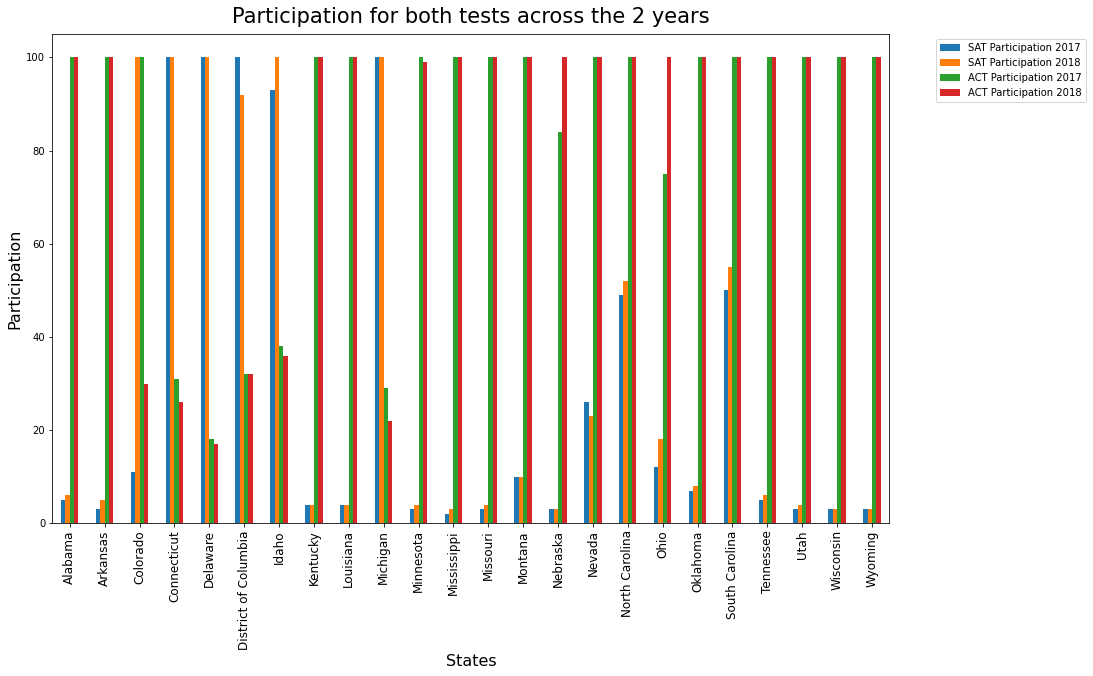

In [17]:
# States with either 100% participation for either SAT/ACT for either year
states = final[['state','sat_participation_2017','sat_participation_2018','act_participation_2017','act_participation_2018']][(final['sat_participation_2017'] == 100) | (final['sat_participation_2018'] == 100) | (final['act_participation_2017'] == 100) | (final['act_participation_2018'] == 100)]
graph = states.plot(kind = 'bar',figsize=(15,9))
# Set the title.
graph.set_title('Participation for both tests across the 2 years', fontsize=21, y=1.01);

# Move the legend outside the graph and label the columns
graph.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',labels = ['SAT Participation 2017','SAT Participation 2018','ACT Participation 2017','ACT Participation 2018'])

# x-axis labels
graph.set_ylabel('Participation', fontsize=16);

# y-axis labels
graph.set_xlabel('States', fontsize=16);

# set x tick labels to States
graph.set_xticklabels(states['state'], fontsize = 12);

Besides Colorado, the change in SAT format had did not have any significant impact on the participation rate going from SAT to ACT

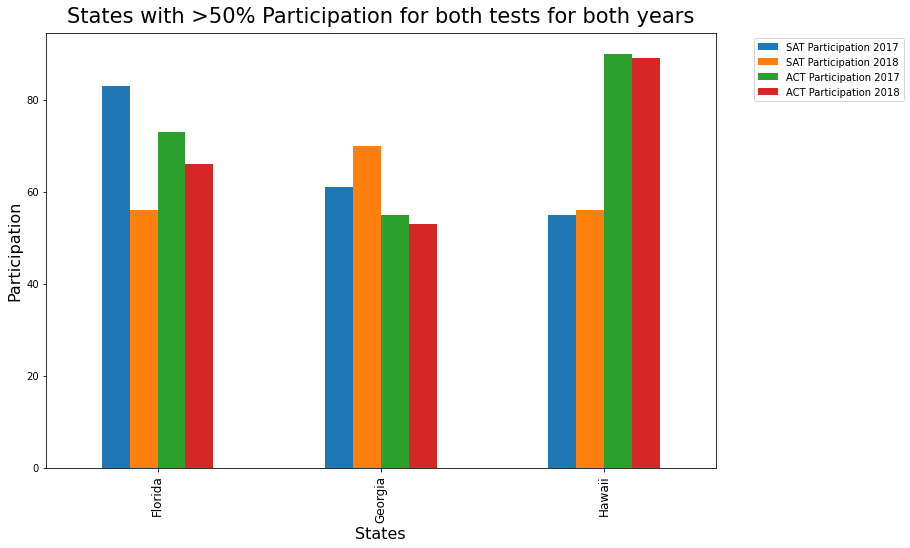

In [21]:
# States with >50% participation on both tests for either year
filtered_sat_states = final[['state','sat_participation_2017','sat_participation_2018','act_participation_2017','act_participation_2018']][(final['sat_participation_2017'] > 50) & (final['sat_participation_2018'] > 50) & (final['act_participation_2017'] > 50) & (final['act_participation_2018'] > 50)]

filtered_graph = filtered_sat_states.plot(kind = 'bar', figsize = (12,8))

# Set the title.
filtered_graph.set_title('States with >50% Participation for both tests for both years', fontsize=21, y=1.01);

# Moving and labelling legend
filtered_graph.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',labels = ['SAT Participation 2017','SAT Participation 2018','ACT Participation 2017','ACT Participation 2018']);

# x-axis labels
filtered_graph.set_ylabel('Participation', fontsize=16);

# y-axis labels
filtered_graph.set_xlabel('States', fontsize=16);

# set x tick labels to States
filtered_graph.set_xticklabels(filtered_sat_states['state'],fontsize = 12);

In [127]:
final[final['state'].isin(['Florida','Georgia','Hawaii'])]

state  sat_participation_2017  \
9   Florida                      83   
10  Georgia                      61   
11   Hawaii                      55   

    sat_evidence_based_reading_and_writing_2017  sat_math_2017  \
9                                           520            497   
10                                          535            515   
11                                          544            541   

    sat_total_2017  act_participation_2017  act_english_2017  act_math_2017  \
9             1017                      73              19.0           19.4   
10            1050                      55              21.0           20.9   
11            1085                      90              17.8           19.2   

    act_reading_2017  act_science_2017  ...  sat_participation_2018  \
9               21.0              19.4  ...                      56   
10              22.0              21.3  ...                      70   
11              19.2              19.3  ...                      56   

    sat_evidence_based_reading_and_writing_2018  sat_math_2018  \
9                                           550            549   
10                                          542            522   
11                                          480            530   

    sat_total_2018  act_participation_2018  act_composite_2018  \
9             1099                      66                19.9   
10            1064                      53                21.4   
11            1010                      89                18.9   

    act_english_2018  act_math_2018  act_reading_2018  act_science_2018  
9               19.2           19.3              21.1              19.5  
10              20.9           20.7              21.2              21.4  
11              18.2           19.0              19.1              19.0  

[3 rows x 21 columns]

None of these states require either of the test for entry into colleges but interestingly, students in Hawaii seem to prefer ACT over SAT

array([[ 1.        , -0.84123446],
       [-0.84123446,  1.        ]])

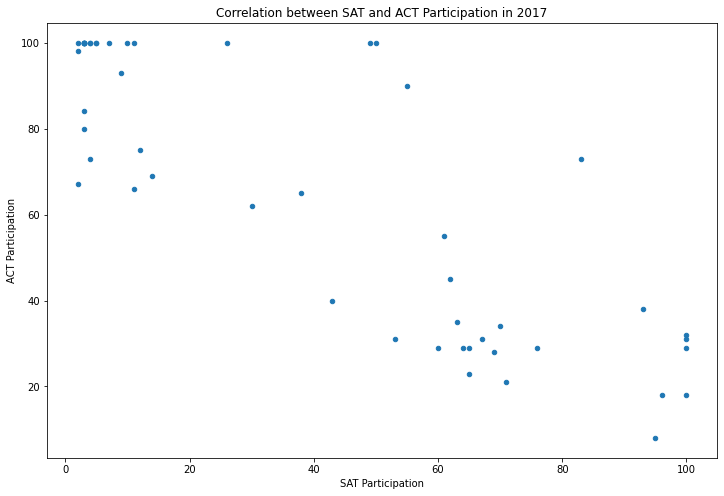

In [130]:
# Scatterplot to determine and quantify correlation between ACT and SAT participation in 2017
participation_2017 = final.plot(kind='scatter', x='sat_participation_2017', y='act_participation_2017',figsize = (12,8));

# Set title
participation_2017.set_title('Correlation between SAT and ACT Participation in 2017');

# Set x and y axis
participation_2017.set_xlabel('SAT Participation');
participation_2017.set_ylabel('ACT Participation');

np.corrcoef(x=final['sat_participation_2017'], y=final['act_participation_2017'])

array([[ 1.        , -0.86810278],
       [-0.86810278,  1.        ]])

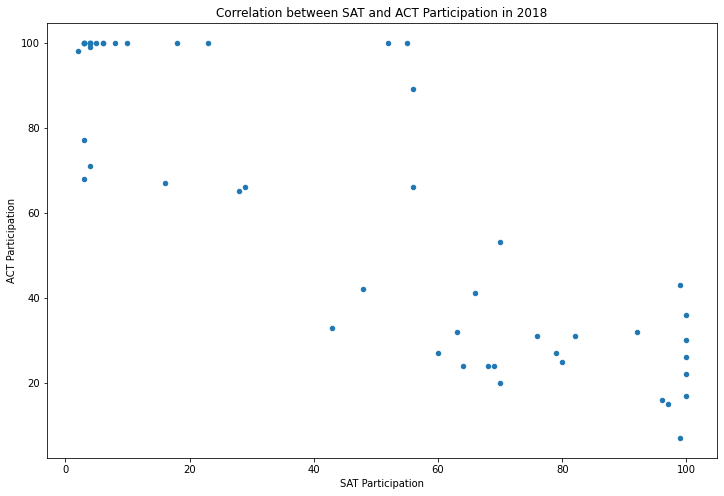

In [131]:
# Scatterplot to determine and quantify correlation between ACT and SAT participation in 2018
participation_2018 = final.plot(kind='scatter', x='sat_participation_2018', y='act_participation_2018',figsize = (12,8));

# Set title
participation_2018.set_title('Correlation between SAT and ACT Participation in 2018');

# Set x and y axis
participation_2018.set_xlabel('SAT Participation');
participation_2018.set_ylabel('ACT Participation');

np.corrcoef(x=final['sat_participation_2018'], y=final['act_participation_2018'])

A scatterplot to better depict the correlation between ACT and SAT participation rates regardless of the year

array([[ 1.        , -0.86753981],
       [-0.86753981,  1.        ]])

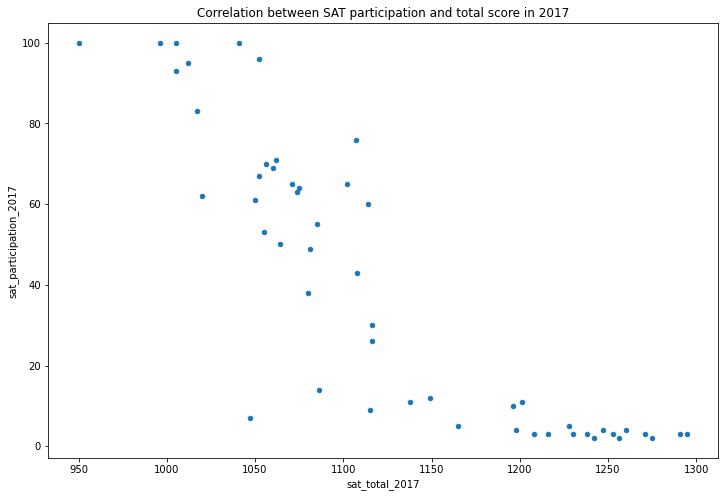

In [135]:
# Scatterplot to determine and quantify correlation between SAT participation and total score in 2017
total_2017 = final.plot(kind='scatter', x='sat_total_2017', y='sat_participation_2017',figsize = (12,8));

# Set title
total_2017.set_title('Correlation between SAT participation and total score in 2017');

# Set x and y axis
participation_2018.set_xlabel('Participation');
participation_2018.set_ylabel('Total score');
np.corrcoef(x=final['sat_participation_2017'], y=final['sat_total_2017'])

array([[ 1.        , -0.78592599],
       [-0.78592599,  1.        ]])

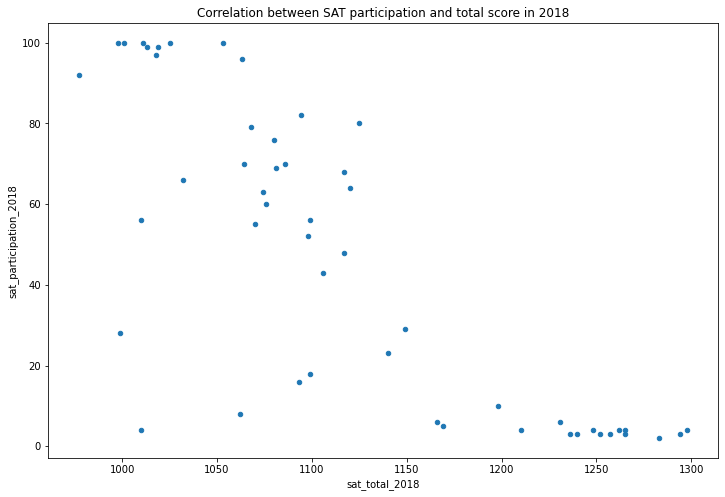

In [142]:
# Scatterplot to determine and quantify correlation between SAT participation and total score in 2018
total_2017 = final.plot(kind='scatter', x='sat_total_2018', y='sat_participation_2018',figsize = (12,8));

# Set title
total_2017.set_title('Correlation between SAT participation and total score in 2018');

# Set x and y axis
participation_2018.set_xlabel('Participation');
participation_2018.set_ylabel('Total score');
np.corrcoef(x=final['sat_participation_2018'], y=final['sat_total_2018'])

array([[ 1.        , -0.85813416],
       [-0.85813416,  1.        ]])

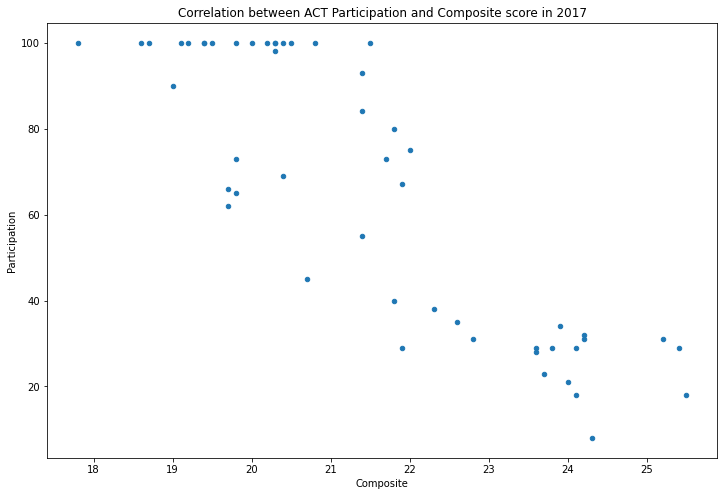

In [144]:
# Scatterplot to determine and quantify correlation between ACT Composite score and participation in 2017
comp_part_2017 = final.plot(kind='scatter', x='act_composite_2017', y='act_participation_2017',figsize = (12,8));

# Set title
comp_part_2017.set_title('Correlation between ACT Participation and Composite score in 2017');

# Set x and y axis
comp_part_2017.set_xlabel('Composite');
comp_part_2017.set_ylabel('Participation');

np.corrcoef(x=final['act_composite_2017'], y=final['act_participation_2017'])

The suspected correlation between ACT participation and composite scores are now more apparent using the scatterplots regardless of the year

array([[ 1.        , -0.85803141],
       [-0.85803141,  1.        ]])

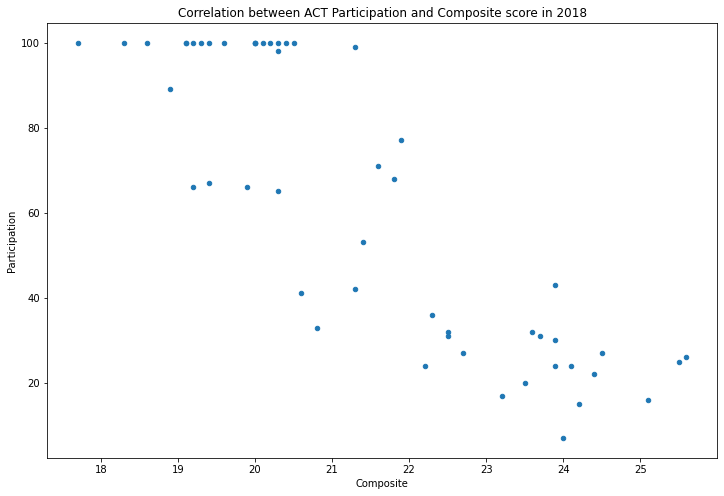

In [145]:
# Scatterplot to determine and quantify correlation between ACT Composite score and participation in 2018
comp_part_2017 = final.plot(kind='scatter', x='act_composite_2018', y='act_participation_2018',figsize = (12,8));

# Set title
comp_part_2017.set_title('Correlation between ACT Participation and Composite score in 2018');

# Set x and y axis
comp_part_2017.set_xlabel('Composite');
comp_part_2017.set_ylabel('Participation');

np.corrcoef(x=final['act_composite_2018'], y=final['act_participation_2018'])

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

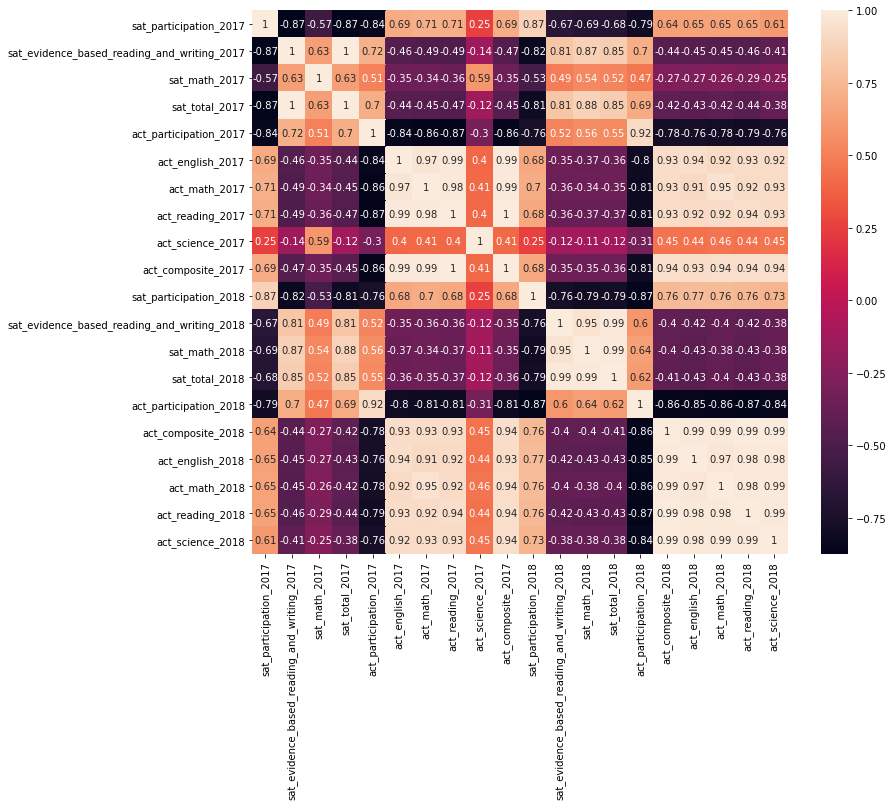

In [24]:
plt.figure(figsize = (12,10))
sns.heatmap(final.corr(),annot = True)

A heatmap to better identify variables that are strongly correlated

#### Custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

In [152]:
# Function to subplot histograms
def subplot_histograms(dataframe, list_of_columns, list_of_titles, xlabels, ylabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize = (12,10)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column], bins = 20) # feel free to add more settings
    for i, title in enumerate(titles):
         ax[i].set_title(title)
    for i, xlabel in enumerate(xlabels):
         ax[i].set_xlabel(xlabel)# Set titles, labels, etc here for each subplot
    for i, ylabel in enumerate(ylabels):
         ax[i].set_ylabel(ylabel)

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

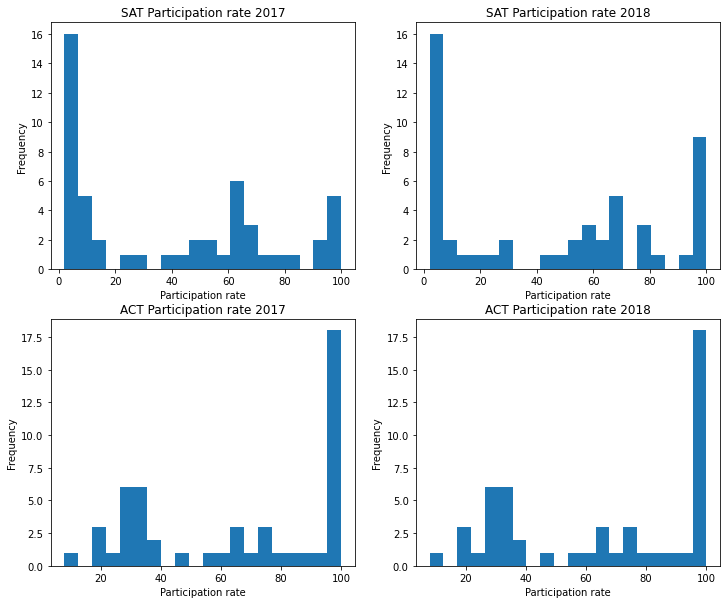

In [149]:
# Histograms of Participation rates for SAT & ACT in both years
columns = ['sat_participation_2017','sat_participation_2018','act_participation_2017','act_participation_2017']
titles = ['SAT Participation rate 2017','SAT Participation rate 2018','ACT Participation rate 2017','ACT Participation rate 2018']
xlabels = ['Participation rate','Participation rate','Participation rate','Participation rate']
ylabels = ['Frequency','Frequency','Frequency','Frequency']
subplot_histograms(final, columns,titles, xlabels, ylabels)

The SAT Participation graphs are highly right skewed while the ACT Participation graphs are highly left skewed.
There is a high number of states with poor SAT participation and therefore could be tapped on. Moreover, the ACT is seemingly preferred given that there are higher number of states with higher participation rates

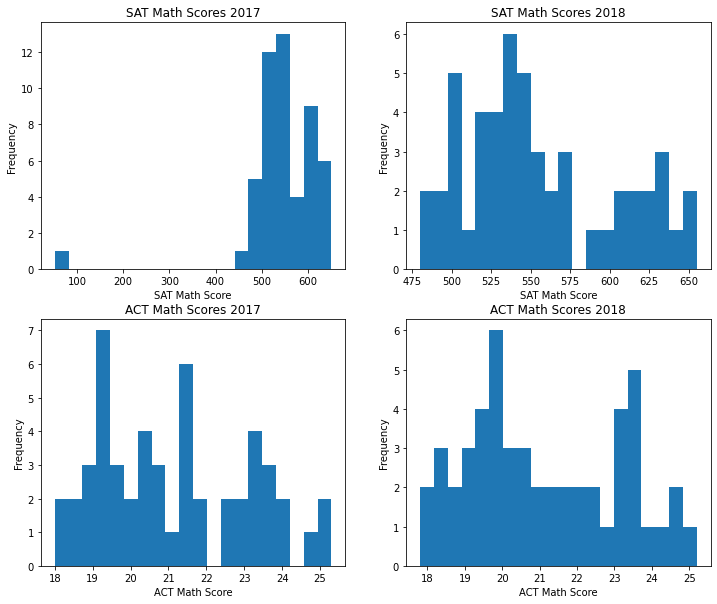

In [153]:
# Histograms of Math scores for SAT & ACT in both years
columns = ['sat_math_2017','sat_math_2018','act_math_2017','act_math_2018']
titles = ['SAT Math Scores 2017','SAT Math Scores 2018','ACT Math Scores 2017', 'ACT Math Scores 2018']
xlabels = ['SAT Math Score','SAT Math Score','ACT Math Score','ACT Math Score']
ylabels = ['Frequency','Frequency','Frequency','Frequency']
subplot_histograms(final,columns,titles,xlabels,ylabels)

The mean ACT Math scores for both years are slightly bimodal and thus could indicate clusters with poorer (19) and better math scores(23).
There is also an anomaly in the SAT Math score in 2017 which belongs to Maryland. 

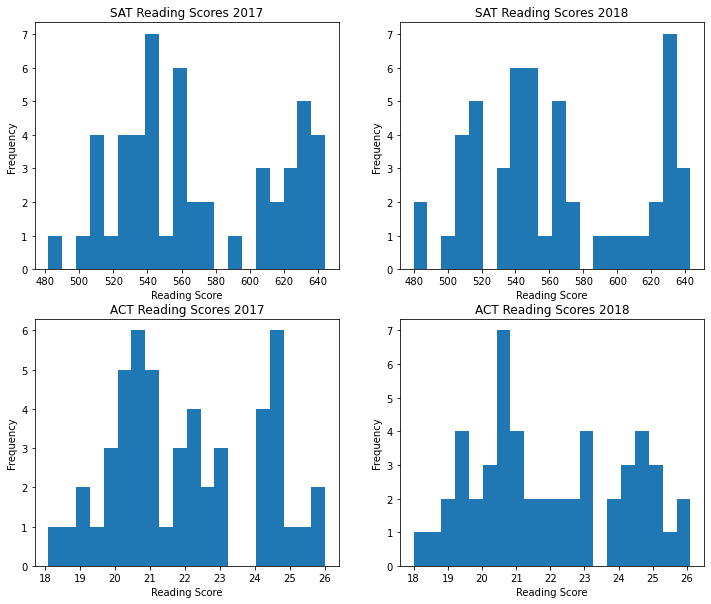

In [154]:
# Histograms for Reading/verbal scores for SAT & ACT
columns = ['sat_evidence_based_reading_and_writing_2017','sat_evidence_based_reading_and_writing_2018','act_reading_2017','act_reading_2018']
titles = ['SAT Reading Scores 2017', 'SAT Reading Scores 2018', 'ACT Reading Scores 2017', 'ACT Reading Scores 2018']
xlabels = ['Reading Score','Reading Score','Reading Score','Reading Score']
ylabels = ['Frequency','Frequency','Frequency','Frequency']
subplot_histograms(final,columns,titles,xlabels,ylabels)

# The reading scores for SAT and ACT remain consistent going from 2017 to 2018

For the SAT reading scores for both years, the graphs are fairly bimodal with peaks at around 540 and 630. However, there is a change in frequency going from 2017 to 2018; there is a larger cluster of students who are doing better at the reading and writing subject than in 2017. <br>
For the ACT reading scores, there are 2 visible peaks as well at around a score of 20 and 24. However, the frequency for the reading score of 24 has declined in 2018.

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

array([[ 1.       , -0.3409059],
       [-0.3409059,  1.       ]])

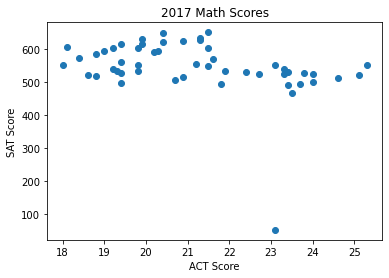

In [69]:
# SAT vs ACT math Scores for 2017
plt.scatter(final['act_math_2017'],final['sat_math_2017'])
plt.title('2017 Math Scores')
plt.ylabel('SAT Score')
plt.xlabel('ACT Score');
np.corrcoef(final['sat_math_2017'],final['act_math_2017'])

There is no clear correlation between SAT and ACT scores in 2017, as seen in the calculated correlation coefficient of -0.34

array([[ 1.       , -0.4884406],
       [-0.4884406,  1.       ]])

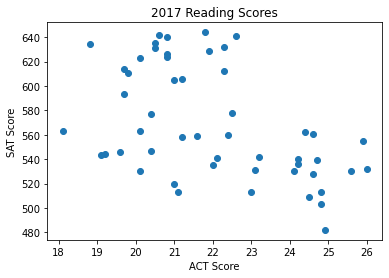

In [165]:
# SAT vs. ACT verbal/reading scores for 2017
plt.scatter(final['act_reading_2017'],final['sat_evidence_based_reading_and_writing_2017'])
plt.title('2017 Reading Scores')
plt.ylabel('SAT Score')
plt.xlabel('ACT Score');
np.corrcoef(final['sat_evidence_based_reading_and_writing_2017'],final['act_reading_2017'])

There is a weak negative correlation between SAT reading, writing scores and ACT reading scores, it could be due to the format of the tests taken as SAT tests fewer questions tested per minute and focuses more on evidence based questions. Therefore there is a weak correlation between the 2 seemingly similar subjects

array([[ 1.        , -0.44502019],
       [-0.44502019,  1.        ]])

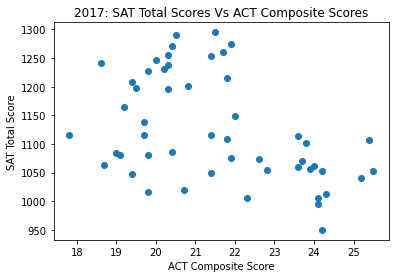

In [71]:
# SAT vs. ACT total/composite scores for 2017
plt.scatter(final['act_composite_2017'],final['sat_total_2017'])
plt.title('2017: SAT Total Scores Vs ACT Composite Scores')
plt.ylabel('SAT Total Score')
plt.xlabel('ACT Composite Score');
np.corrcoef(final['sat_total_2017'],final['act_composite_2017'])

There is a slight inverse correlation between SAT total score and ACT composite score which could suggest a preference for either test, depending on the state requirements and policies.

array([[1.       , 0.8527271],
       [0.8527271, 1.       ]])

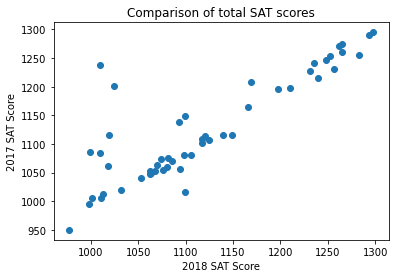

In [137]:
# Total scores for SAT 2017 vs. 2018
plt.scatter(final['sat_total_2018'],final['sat_total_2017'])
plt.title('Comparison of total SAT scores')
plt.ylabel('2017 SAT Score')
plt.xlabel('2018 SAT Score');
np.corrcoef(final['sat_total_2017'],final['sat_total_2018'])

The distribution of SAT scores across the years have remain consistent despite SAT format changes

array([[1.        , 0.93927109],
       [0.93927109, 1.        ]])

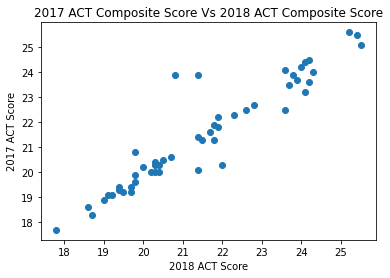

In [71]:
# Composite scores for ACT 2017 vs. 2018
plt.scatter(final['act_composite_2017'],final['act_composite_2018'])
plt.title('2017 ACT Composite Score Vs 2018 ACT Composite Score')
plt.ylabel('2017 ACT Score')
plt.xlabel('2018 ACT Score');
np.corrcoef(final['act_composite_2017'],final['act_composite_2018'])

There is a **strong positive correlation** between the 2017 ACT Composite score and 2018 ACT Composite score

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

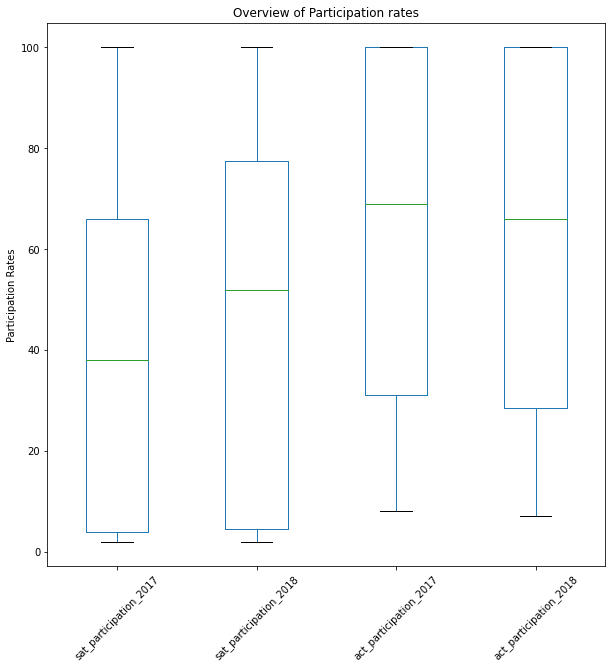

In [85]:
# 1) Boxplots of participation rates for SAT and ACT 
final[['sat_participation_2017','sat_participation_2018','act_participation_2017','act_participation_2018']].plot(kind='box', figsize = (10,10))

# Setting title
plt.title('Overview of Participation rates');

# Modifying x-ticks
plt.xticks(rotation=45)

# Labelling y-axis
plt.ylabel('Participation Rates');


In [94]:
# Closer look at the mean and std of participation rates
final[['sat_participation_2017','sat_participation_2018','act_participation_2017','act_participation_2018']].describe().transpose()

count       mean        std  min   25%   50%    75%  \
sat_participation_2017   51.0  39.803922  35.276632  2.0   4.0  38.0   66.0   
sat_participation_2018   51.0  45.745098  37.314256  2.0   4.5  52.0   77.5   
act_participation_2017   51.0  65.254902  32.140842  8.0  31.0  69.0  100.0   
act_participation_2018   51.0  61.647059  34.080976  7.0  28.5  66.0  100.0   

                          max  
sat_participation_2017  100.0  
sat_participation_2018  100.0  
act_participation_2017  100.0  
act_participation_2018  100.0

1) There is a **general shift in preference** from SAT to ACT given the increase in average SAT participation rate but a slight dip in the average ACT participation rate from 2017 to 2018. 
- Given that the 25th percentile for the average SAT participation rates are much lower compared to ACT, there is a huge untapped market where an upswing of SAT participation rates could occur


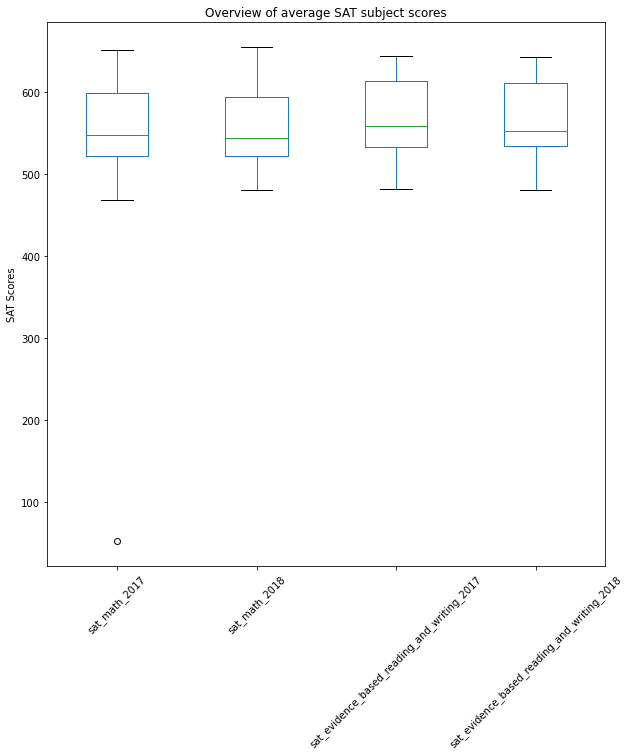

In [88]:
# 2) Boxplots of average scores of all SAT subjects across the 2 years
final[['sat_math_2017','sat_math_2018','sat_evidence_based_reading_and_writing_2017','sat_evidence_based_reading_and_writing_2018']].plot(kind='box', figsize = (10,10))

# Setting the title
plt.title('Overview of average SAT subject scores');

# Modifying x-ticks
plt.xticks(rotation=45);

#Labelling y-axis
plt.ylabel('SAT Scores');


In [155]:
# Closer look at the mean and std of average scores
final[['sat_math_2017','sat_math_2018','sat_evidence_based_reading_and_writing_2017','sat_evidence_based_reading_and_writing_2018']].describe().transpose()

count        mean        std  \
sat_math_2017                                 51.0  547.627451  84.909119   
sat_math_2018                                 51.0  556.235294  47.772623   
sat_evidence_based_reading_and_writing_2017   51.0  569.117647  45.666901   
sat_evidence_based_reading_and_writing_2018   51.0  563.686275  47.502627   

                                               min    25%    50%    75%    max  
sat_math_2017                                 52.0  522.0  548.0  599.0  651.0  
sat_math_2018                                480.0  522.5  544.0  593.5  655.0  
sat_evidence_based_reading_and_writing_2017  482.0  533.5  559.0  613.0  644.0  
sat_evidence_based_reading_and_writing_2018  480.0  534.5  552.0  610.5  643.0

2) There is an anomaly in the Math score which was discovered in the [2017 SAT data cleaning section](#2017-Data-Import-and-Cleaning) and it belongs to Maryland. In addition, the standard deviation would be greatly affected because of this anomaly and hence it is much higher in 2017 than in 2018

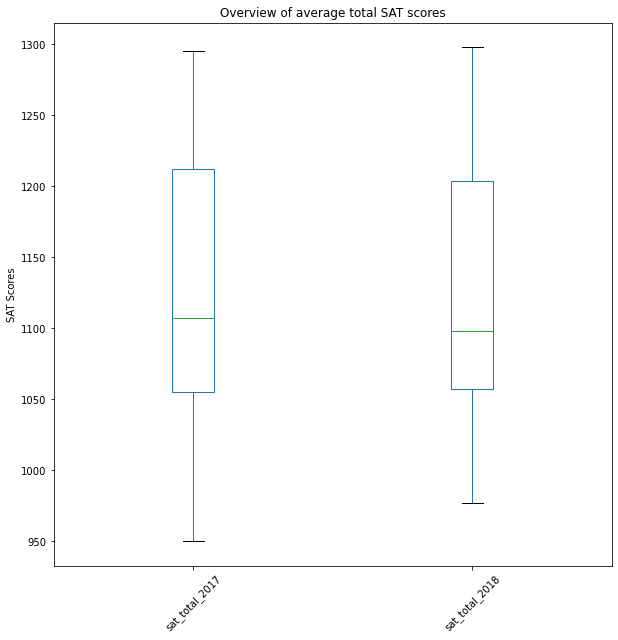

In [92]:
# Boxplots of total SAT scores
final[['sat_total_2017','sat_total_2018']].plot(kind='box', figsize = (10,10));

# Setting the title
plt.title('Overview of average total SAT scores');

# Modifying x-ticks
plt.xticks(rotation=45);

#Labelling y-axis
plt.ylabel('SAT Scores');


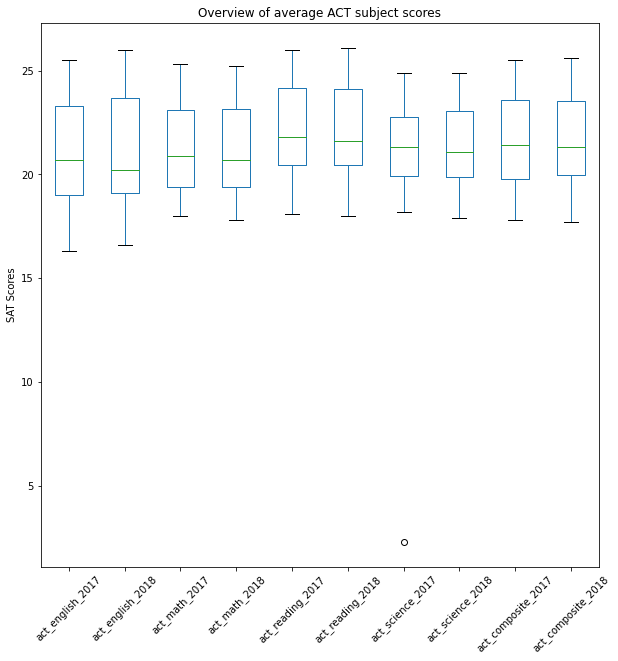

In [93]:
# Boxplots of average ACT subject scores
final[['act_english_2017','act_english_2018','act_math_2017','act_math_2018','act_reading_2017','act_reading_2018','act_science_2017','act_science_2018','act_composite_2017','act_composite_2018']].plot(kind='box', figsize = (10,10))

# Setting the title
plt.title('Overview of average ACT subject scores');

# Modifying x-ticks
plt.xticks(rotation=45);

#Labelling y-axis
plt.ylabel('SAT Scores');


## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [167]:
 final.describe().transpose()

count         mean        std  \
sat_participation_2017                        51.0    39.803922  35.276632   
sat_evidence_based_reading_and_writing_2017   51.0   569.117647  45.666901   
sat_math_2017                                 51.0   547.627451  84.909119   
sat_total_2017                                51.0  1126.098039  92.494812   
act_participation_2017                        51.0    65.254902  32.140842   
act_english_2017                              51.0    20.931373   2.353677   
act_math_2017                                 51.0    21.182353   1.981989   
act_reading_2017                              51.0    22.013725   2.067271   
act_science_2017                              51.0    21.041176   3.182463   
act_composite_2017                            51.0    21.519608   2.020695   
sat_participation_2018                        51.0    45.745098  37.314256   
sat_evidence_based_reading_and_writing_2018   51.0   563.686275  47.502627   
sat_math_2018                                 51.0   556.235294  47.772623   
sat_total_2018                                51.0  1120.019608  94.155083   
act_participation_2018                        51.0    61.647059  34.080976   
act_composite_2018                            51.0    21.486275   2.106278   
act_english_2018                              51.0    20.988235   2.446356   
act_math_2018                                 51.0    21.125490   2.035765   
act_reading_2018                              51.0    22.015686   2.167245   
act_science_2018                              51.0    21.345098   1.870114   

                                               min      25%     50%      75%  \
sat_participation_2017                         2.0     4.00    38.0    66.00   
sat_evidence_based_reading_and_writing_2017  482.0   533.50   559.0   613.00   
sat_math_2017                                 52.0   522.00   548.0   599.00   
sat_total_2017                               950.0  1055.50  1107.0  1212.00   
act_participation_2017                         8.0    31.00    69.0   100.00   
act_english_2017                              16.3    19.00    20.7    23.30   
act_math_2017                                 18.0    19.40    20.9    23.10   
act_reading_2017                              18.1    20.45    21.8    24.15   
act_science_2017                               2.3    19.90    21.3    22.75   
act_composite_2017                            17.8    19.80    21.4    23.60   
sat_participation_2018                         2.0     4.50    52.0    77.50   
sat_evidence_based_reading_and_writing_2018  480.0   534.50   552.0   610.50   
sat_math_2018                                480.0   522.50   544.0   593.50   
sat_total_2018                               977.0  1057.50  1098.0  1204.00   
act_participation_2018                         7.0    28.50    66.0   100.00   
act_composite_2018                            17.7    19.95    21.3    23.55   
act_english_2018                              16.6    19.10    20.2    23.70   
act_math_2018                                 17.8    19.40    20.7    23.15   
act_reading_2018                              18.0    20.45    21.6    24.10   
act_science_2018                              17.9    19.85    21.1    23.05   

                                                max  
sat_participation_2017                        100.0  
sat_evidence_based_reading_and_writing_2017   644.0  
sat_math_2017                                 651.0  
sat_total_2017                               1295.0  
act_participation_2017                        100.0  
act_english_2017                               25.5  
act_math_2017                                  25.3  
act_reading_2017                               26.0  
act_science_2017                               24.9  
act_composite_2017                             25.5  
sat_participation_2018                        100.0  
sat_evidence_based_reading_and_writing_2018   643.0  
sat_math_2018          

The mean and median are representatives of the central tendencies of the data which are helpful when determining the normality or sknewness of the data while the standard deviation and interquartile range describes about the spread and variability of data. <br> 

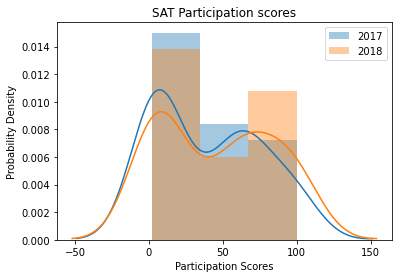

In [25]:
# Distribution plots for SAT participation rates
sns.distplot(final['sat_participation_2017'])
sns.distplot(final['sat_participation_2018'])
plt.legend(labels=['2017','2018'])
plt.xlabel('Participation Scores')
plt.ylabel('Probability Density')
plt.title('SAT Participation scores');

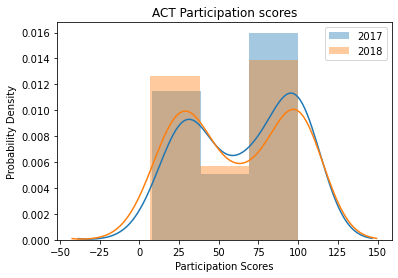

In [26]:
# Distribution plots for ACT participation rates
sns.distplot(final['act_participation_2017'])
sns.distplot(final['act_participation_2018'])
plt.legend(labels=['2017','2018'])
plt.xlabel('Participation Scores')
plt.ylabel('Probability Density')
plt.title('ACT Participation scores');

In terms of participation rates, there is an increase in average SAT participation from 39.8 to 45.7 from 2017 to 2018. In addition, there is a shift in the right peak of the bimodal graph going from 2017 and 2018 which shows a promising trend of the inclusion of SAT as a college exam. Moreover, there is a peak at the lower end of the participation rate(0%) and this shows that there is a huge market for the growth of SAT inclusion. Therefore it would be promising to invest in promoting the use of SAT exams. <br>

For the SAT subjects, the standard deviation of the math score in 2017 is unexpectedly high, at 84 compared to 47 in 2018 and it is due to the anomaly in the recorded math results for the state of Maryland which would drastically increase the standard deviation. <br>

For the ACT subjects, the spread of scores are fairly consistent for most subjects across the two years as the standard deviation at around 2. However there is an unexpectedly large standard deviation for the science subject in 2017 which is at 3.18 which subsequently fell to 1.8 in 2018. The average score for all ACT subjects are fairly similar but students tend to score better on average in the reading component for both of the years as the mean score is the highest for both years <br>

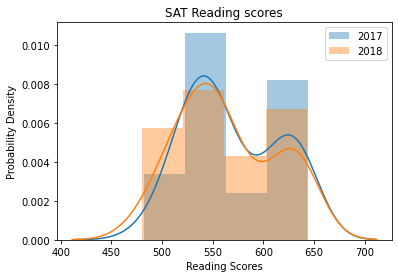

In [27]:
# Distribution plots for SAT subjects
sns.distplot(final['sat_evidence_based_reading_and_writing_2017'])
sns.distplot(final['sat_evidence_based_reading_and_writing_2018'])

plt.legend(labels=['2017','2018'])
plt.xlabel('Reading Scores')
plt.ylabel('Probability Density')
plt.title('SAT Reading scores');

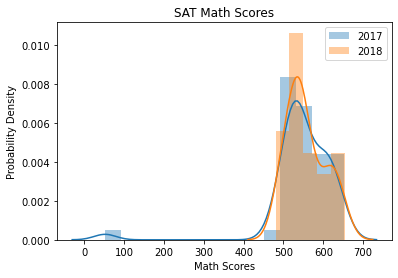

In [30]:
sns.distplot(final['sat_math_2017'])
sns.distplot(final['sat_math_2018'])

plt.legend(labels=['2017','2018'])
plt.xlabel('Math Scores')
plt.ylabel('Probability Density')
plt.title('SAT Math Scores');

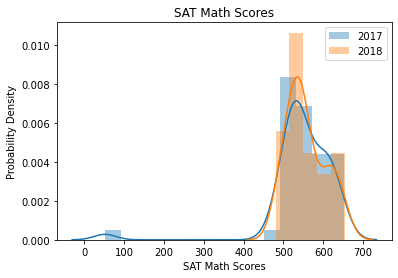

In [31]:
sns.distplot(final['sat_math_2017'])
sns.distplot(final['sat_math_2018'])
plt.legend(labels=['2017','2018'])
plt.xlabel('SAT Math Scores')
plt.ylabel('Probability Density')
plt.title('SAT Math Scores');

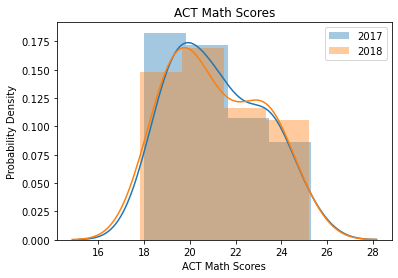

In [32]:
sns.distplot(final['act_math_2017'])
sns.distplot(final['act_math_2018'])
plt.legend(labels=['2017','2018'])
plt.xlabel('ACT Math Scores')
plt.ylabel('Probability Density')
plt.title('ACT Math Scores');

**Math:** <br>
The Math scores for both tests slightly tends towards a normal distribution given that both tests result in bimodal graphs regardless of the year and are slightly skewed to the right. Therefore the math results might not be representative of the actual population results

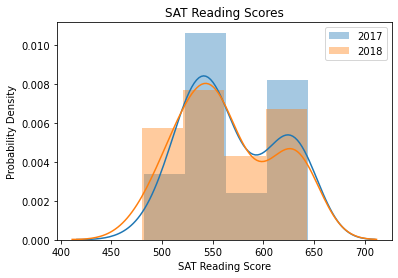

In [33]:
sns.distplot(final['sat_evidence_based_reading_and_writing_2017'])
sns.distplot(final['sat_evidence_based_reading_and_writing_2018'])
plt.legend(labels=['2017','2018'])
plt.xlabel('SAT Reading Score')
plt.ylabel('Probability Density')
plt.title('SAT Reading Scores');

**SAT Reading scores:** <br>
Compared to the math score, the evidence based reading and writing subject shows a more visible bimodal graph with obvious peaks at around 550 and 625 and does not tend towards normality. 

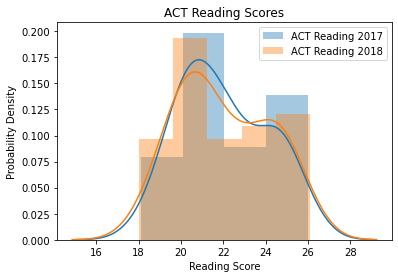

In [34]:
# Plotting ACT reading scores for both years
sns.distplot(final['act_reading_2017'])
sns.distplot(final['act_reading_2018'])

#Label x-axis
plt.xlabel('Reading Score')

#label y-axis
plt.ylabel('Probability Density')

#Adding a legend 
plt.legend(labels=['ACT Reading 2017','ACT Reading 2018'])

#title
plt.title('ACT Reading Scores');

**ACT Reading scores:** <br>
This graph shows a bimodal distribution, showing two obvious clusters at scores of 21 and 24 for both years. The right peak is not as sharp as that of SAT and tends more towards a normal distribution. 

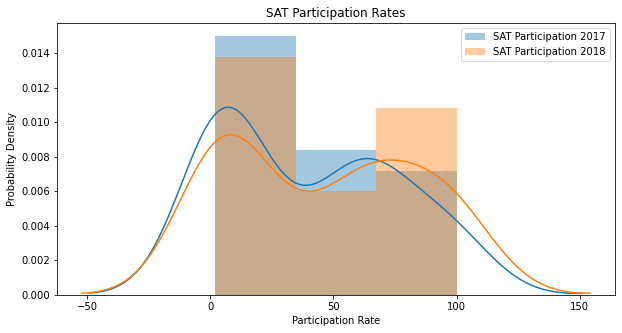

In [36]:
# Adjusting Figure Size 
plt.figure(figsize=(10,5))

# Plotting distribution plots for all SAT and ACT participation rates for both years
sns.distplot(final['sat_participation_2017'])
sns.distplot(final['sat_participation_2018'])

#Label x-axis
plt.xlabel('Participation Rate')

#label y-axis
plt.ylabel('Probability Density')

#Adding a legend 
plt.legend(labels=['SAT Participation 2017','SAT Participation 2018'])

# Title
plt.title('SAT Participation Rates');

**SAT Participation rates:**

The SAT participation rate has a bimodal distribution, with peaks at around 0% and 75% for both years. However, there is an shift towards a higher participation rate as the cluster size for groups with 0% has decreased and the right peak has shifted towards a higher participation rate in 2018. This shows a greater acceptance of SAT exams going from 2017 to 2018. 

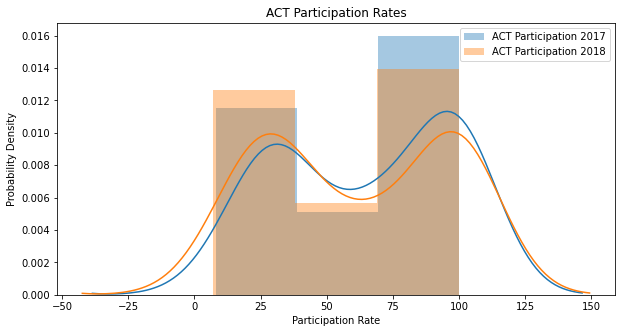

In [37]:
# Adjusting Figure Size 
plt.figure(figsize=(10,5))

# Plotting distribution plots for all SAT and ACT participation rates for both years
sns.distplot(final['act_participation_2017'])
sns.distplot(final['act_participation_2018'])

#Label x-axis
plt.xlabel('Participation Rate')

#label y-axis
plt.ylabel('Probability Density')

#Adding a legend 
plt.legend(labels=['ACT Participation 2017','ACT Participation 2018'])

#title
plt.title('ACT Participation Rates');

**ACT Participation rates:**

The ACT participation rate has a bimodal distribution, with peaks at around 25% and 100% for both years. However, there is an decrease in the cluster size with participation rates of 100%.

#### Limitations of Data:
There is a value in drawing insights from this data. However, there is a **limited** amount of inference that can be made from the graphs. 
- This is because most of the variables do not tends towards a normal distribution and given that clusters can be seen in most variables and thus hard to draw conclusions about the means. 
- In addition, there is a greater disparity in terms of population size across the states and thus the change in participation rates which are recorded as percentages would be much more drastic in areas with smaller populations than areas in larger populations. Therefore, **any noise in a smaller state is much more amplified** and would skew the over results, resulting in inaccurate conclusions. 
- Although there are 7 SAT/ACT dates, the data shows a condensed yearly participation rate instead. This disallows for the study of the impact of dates on the participation rates. This could **dilute** important trends seen across the dates and if such data was given, we could make recommendations on adjusting dates to optimize participation rates. 

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

No, it is not appropriate. Based on the correlation graph seen, there is **little** correlation between SAT and ACT math scores although the variables themselves tends more towards normality than others. This could mean that there is a difference in the formats of the Math component between the two exams and therefore there is no guarantee that a high Math score in one test would lead to a similar score in the other. Differences such as the presence of a no-calculator subsection in the SAT Math component might deter students who are more reliant on it for calculations. Moreover, it is difficult to compare across data of different scales since they are graded differently. 

## Outside Research

#### Correlation between SAT and ACT participation rates across the 2 years

array([[ 1.        , -0.84123446],
       [-0.84123446,  1.        ]])

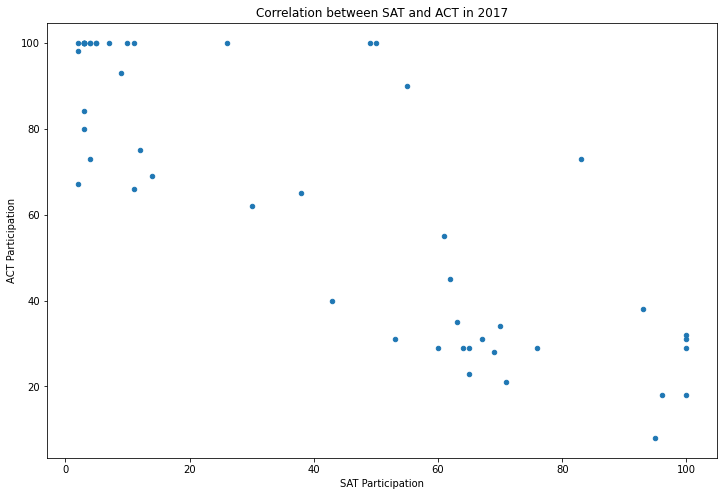

In [31]:
# Scatterplot to determine correlation between ACT and SAT participation
participation_2017 = final.plot(kind='scatter', x='sat_participation_2017', y='act_participation_2017',figsize = (12,8));

# Set title
participation_2017.set_title('Correlation between SAT and ACT in 2017');

# Set x and y axis
participation_2017.set_xlabel('SAT Participation');
participation_2017.set_ylabel('ACT Participation');

np.corrcoef(x=final['sat_participation_2017'], y=final['act_participation_2017'])

array([[ 1.        , -0.86810278],
       [-0.86810278,  1.        ]])

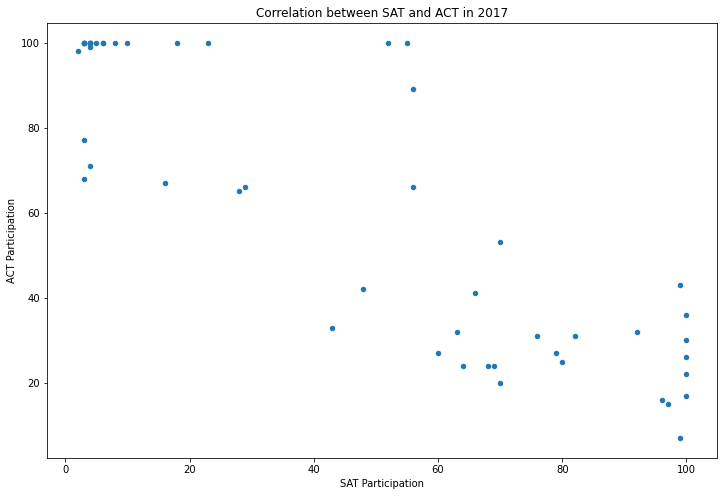

In [32]:
# Scatterplot to determine correlation between ACT and SAT participation
participation_2018 = final.plot(kind='scatter', x='sat_participation_2018', y='act_participation_2018',figsize = (12,8));

# Set title
participation_2018.set_title('Correlation between SAT and ACT in 2017');

# Set x and y axis
participation_2018.set_xlabel('SAT Participation');
participation_2018.set_ylabel('ACT Participation');

np.corrcoef(x=final['sat_participation_2018'], y=final['act_participation_2018'])

There is a strong **negative** correlation between SAT and ACT participation score for **both** years

#### With such a correlation, states with lower ACT participation rates could be a potential state for investment

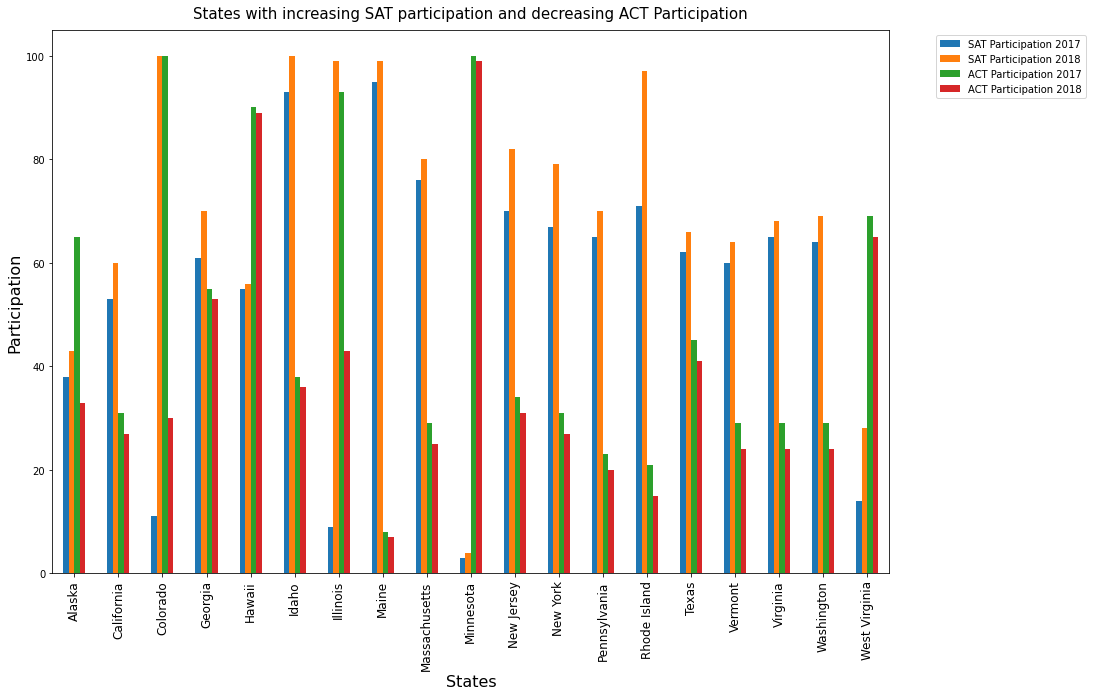

In [39]:
states_to_consider = final[['state','sat_participation_2017','sat_participation_2018','act_participation_2017','act_participation_2018']][(final['sat_participation_2018'] > final['sat_participation_2017']) & (final['act_participation_2017'] > final['act_participation_2018'])]
states_to_consider_graph = states_to_consider.plot(kind = 'bar',figsize = (15,10))
# Set the title.
states_to_consider_graph.set_title('States with increasing SAT participation and decreasing ACT Participation', fontsize=15, y=1.01);

# Move the legend outside the graph
states_to_consider_graph.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',labels = ['SAT Participation 2017','SAT Participation 2018','ACT Participation 2017','ACT Participation 2018']);

# x-axis labels
states_to_consider_graph.set_ylabel('Participation', fontsize=16);

# y-axis labels
states_to_consider_graph.set_xlabel('States', fontsize=16);

# set x tick labels to States
states_to_consider_graph.set_xticklabels(states_to_consider['state'],fontsize = 12);

#### Sudden surge in participation rates in Colorado and Illinois going from 2017 to 2018
- Based on the graph in shown above, **Colorado** and **Illinois** show an interesting surge in SAT participation rate and decline in ACT participation rates. 
- The graph shown below would highlight this trend

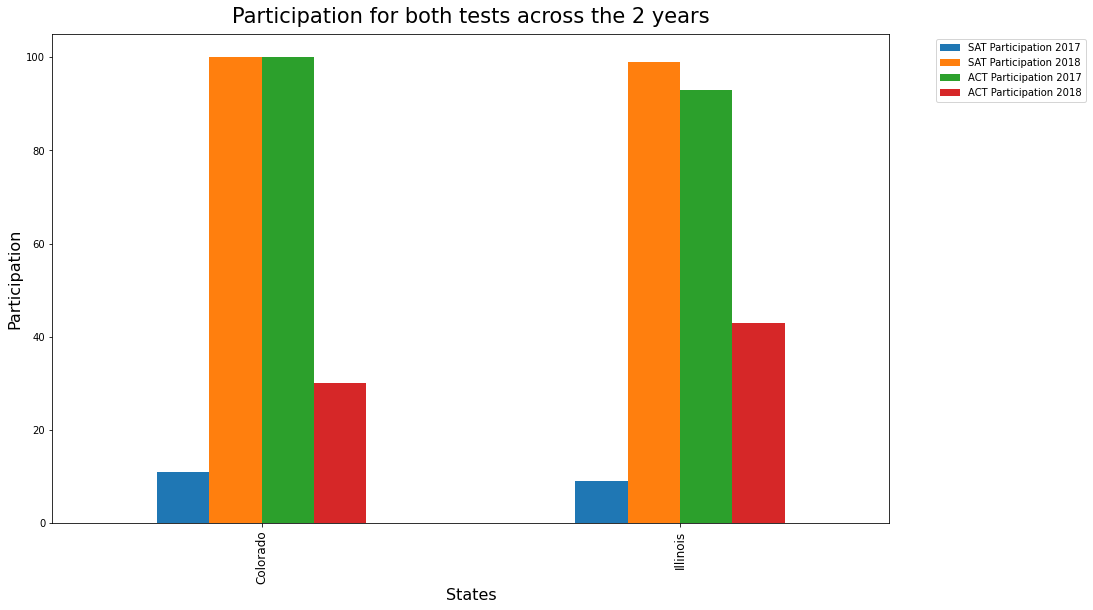

In [40]:
colorado_illinois = final[['state','sat_participation_2017','sat_participation_2018','act_participation_2017','act_participation_2018']][(final['state'] == 'Colorado') | (final['state'] == 'Illinois')]
colorado_illinois_graph = colorado_state.plot(kind = 'bar',figsize=(15,9))
# Set the title.
colorado_illinois_graph.set_title('Participation for both tests across the 2 years', fontsize=21, y=1.01);

# Move the legend outside the graph
colorado_illinois_graph.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',labels = ['SAT Participation 2017','SAT Participation 2018','ACT Participation 2017','ACT Participation 2018']);

# x-axis labels
colorado_illinois_graph.set_ylabel('Participation', fontsize=16);

# y-axis labels
colorado_illinois_graph.set_xlabel('States', fontsize=16);

# set x tick labels to States
colorado_illinois_graph.set_xticklabels(colorado_state['state'], fontsize = 12);

In [21]:
# Drawing the SAT scores and participation rates from Colorado and Illionois
final[['state','sat_participation_2017','sat_total_2017','sat_participation_2018','sat_total_2018','act_participation_2017','act_composite_2017','act_participation_2018','act_composite_2018']][final['state'].isin(['Colorado','Illinois'])]

state  sat_participation_2017  sat_total_2017  sat_participation_2018  \
5   Colorado                      11            1201                     100   
13  Illinois                       9            1115                      99   

    sat_total_2018  act_participation_2017  act_composite_2017  \
5             1025                     100                20.8   
13            1019                      93                21.4   

    act_participation_2018  act_composite_2018  
5                       30                23.9  
13                      43                23.9

### Colorado
Participation rates:
- The state Department of Education has made it **mandatory** and **free of charge** for Colorado high school juniors to take the SAT instead of ACT as the SAT focuses on testing the reasoning skills and critical thinking of students unlike ACT which tests more on rote learning. The applicability of the test has swayed them in making this change therefore there exists such a drastic change. Learning from this data, we could adopt similar strateges to boost participation rates in the state of interest. <br>

SAT total scores and ACT composite scores: <br> 
- Given that we have established a negative correlation between participation rates and test scores, just as expected, Colorado has a huge dip in SAT total score from 1201 in 2017 to 1025 in 2018. Whereas the composite score has increased from 20.8 in 2017 to 23.9 <br>

### Illinois
Participation rates:
- Similarly, the Illinois State Board of Education has made a switch from providing free ACT exam to ~14,000 high school juniors to a state-paid SAT exam. interestingly, policy changes such as **mandating a state-paid SAT** is consistent with that in Colorado and therefore providing convincing effects of such amendments on boosting participation rates.
<br>

SAT total scores and ACT composite scores:
- There is also a dip in the SAT total score from 1115 to 1019 while the composite score has increased from 21.4 to 23.9 going from 2017 to 2018. 


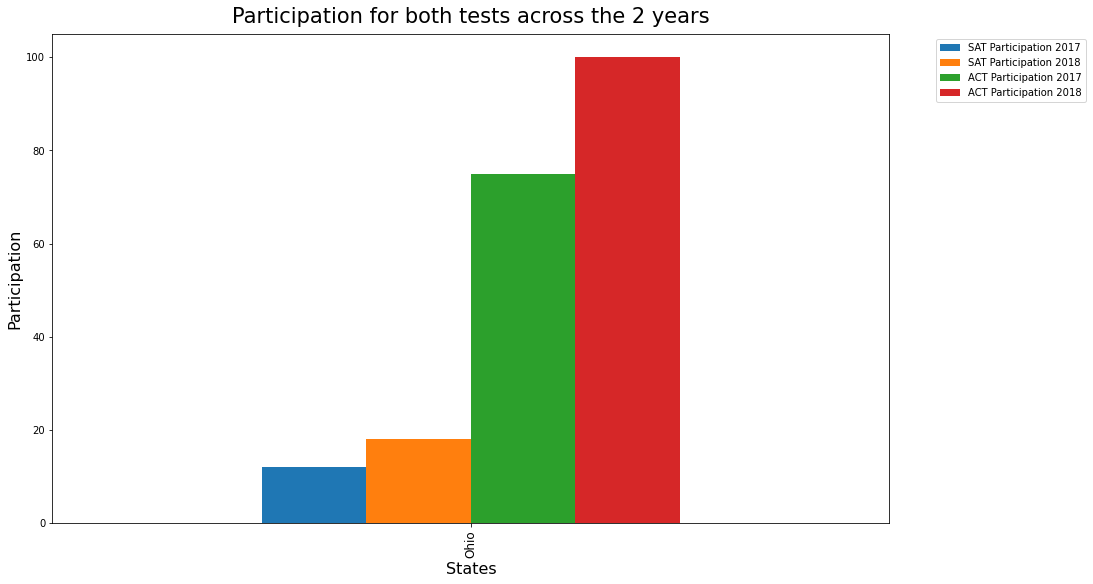

In [12]:
ohio = final[['state','sat_participation_2017','sat_participation_2018','act_participation_2017','act_participation_2018']][(final['state'] == 'Ohio')]
graph = ohio.plot(kind = 'bar',figsize=(15,9))
# Set the title.
graph.set_title('Participation for both tests across the 2 years', fontsize=21, y=1.01);

# Move the legend outside the graph and label the columns
graph.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left',labels = ['SAT Participation 2017','SAT Participation 2018','ACT Participation 2017','ACT Participation 2018'])

# x-axis labels
graph.set_ylabel('Participation', fontsize=16);

# y-axis labels
graph.set_xlabel('States', fontsize=16);

# set x tick labels to States
graph.set_xticklabels(ohio['state'], fontsize = 12);

In [22]:
final[['state','sat_participation_2017','sat_total_2017','sat_participation_2018','sat_total_2018','act_participation_2017','act_composite_2017','act_participation_2018','act_composite_2018']][final['state']=='Ohio']

state  sat_participation_2017  sat_total_2017  sat_participation_2018  \
35  Ohio                      12            1149                      18   

    sat_total_2018  act_participation_2017  act_composite_2017  \
35            1099                      75                22.0   

    act_participation_2018  act_composite_2018  
35                     100                20.3

### Ohio

Based on the graph above which shows compares states with either 100% participation for either SAT/ACT for either year, Ohio stood out as there is an increase in both SAT and ACT participation rates in that state. This goes against the trend where there is an inverse correlation between SAT and ACT participation rates. Interestingly, although students are given the liberty to take either the SAT or the ACT test for **free**, there is an obvious preference for the ACT instead. 

In [44]:
final.describe().transpose()

count         mean        std  \
sat_participation_2017                        51.0    39.803922  35.276632   
sat_evidence_based_reading_and_writing_2017   51.0   569.117647  45.666901   
sat_math_2017                                 51.0   547.627451  84.909119   
sat_total_2017                                51.0  1126.098039  92.494812   
act_participation_2017                        51.0    65.254902  32.140842   
act_english_2017                              51.0    20.931373   2.353677   
act_math_2017                                 51.0    21.182353   1.981989   
act_reading_2017                              51.0    22.013725   2.067271   
act_science_2017                              51.0    21.041176   3.182463   
act_composite_2017                            51.0    21.519608   2.020695   
sat_participation_2018                        51.0    45.745098  37.314256   
sat_evidence_based_reading_and_writing_2018   51.0   563.686275  47.502627   
sat_math_2018                                 51.0   556.235294  47.772623   
sat_total_2018                                51.0  1120.019608  94.155083   
act_participation_2018                        51.0    61.647059  34.080976   
act_composite_2018                            51.0    21.486275   2.106278   
act_english_2018                              51.0    20.988235   2.446356   
act_math_2018                                 51.0    21.125490   2.035765   
act_reading_2018                              51.0    22.015686   2.167245   
act_science_2018                              51.0    21.345098   1.870114   

                                               min      25%     50%      75%  \
sat_participation_2017                         2.0     4.00    38.0    66.00   
sat_evidence_based_reading_and_writing_2017  482.0   533.50   559.0   613.00   
sat_math_2017                                 52.0   522.00   548.0   599.00   
sat_total_2017                               950.0  1055.50  1107.0  1212.00   
act_participation_2017                         8.0    31.00    69.0   100.00   
act_english_2017                              16.3    19.00    20.7    23.30   
act_math_2017                                 18.0    19.40    20.9    23.10   
act_reading_2017                              18.1    20.45    21.8    24.15   
act_science_2017                               2.3    19.90    21.3    22.75   
act_composite_2017                            17.8    19.80    21.4    23.60   
sat_participation_2018                         2.0     4.50    52.0    77.50   
sat_evidence_based_reading_and_writing_2018  480.0   534.50   552.0   610.50   
sat_math_2018                                480.0   522.50   544.0   593.50   
sat_total_2018                               977.0  1057.50  1098.0  1204.00   
act_participation_2018                         7.0    28.50    66.0   100.00   
act_composite_2018                            17.7    19.95    21.3    23.55   
act_english_2018                              16.6    19.10    20.2    23.70   
act_math_2018                                 17.8    19.40    20.7    23.15   
act_reading_2018                              18.0    20.45    21.6    24.10   
act_science_2018                              17.9    19.85    21.1    23.05   

                                                max  
sat_participation_2017                        100.0  
sat_evidence_based_reading_and_writing_2017   644.0  
sat_math_2017                                 651.0  
sat_total_2017                               1295.0  
act_participation_2017                        100.0  
act_english_2017                               25.5  
act_math_2017                                  25.3  
act_reading_2017                               26.0  
act_science_2017                               24.9  
act_composite_2017                             25.5  
sat_participation_2018                        100.0  
sat_evidence_based_reading_and_writing_2018   643.0  
sat_math_2018          

In [102]:
final[final['state'] == 'North Coralina']

Empty DataFrame
Columns: [state, sat_participation_2017, sat_evidence_based_reading_and_writing_2017, sat_math_2017, sat_total_2017, act_participation_2017, act_english_2017, act_math_2017, act_reading_2017, act_science_2017, act_composite_2017, sat_participation_2018, sat_evidence_based_reading_and_writing_2018, sat_math_2018, sat_total_2018, act_participation_2018, act_composite_2018, act_english_2018, act_math_2018, act_reading_2018, act_science_2018]
Index: []

[0 rows x 21 columns]

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

In [23]:
final[final['state'] == 'New Mexico']

state  sat_participation_2017  \
31  New Mexico                      11   

    sat_evidence_based_reading_and_writing_2017  sat_math_2017  \
31                                          577            561   

    sat_total_2017  act_participation_2017  act_english_2017  act_math_2017  \
31            1138                      66              18.6           19.4   

    act_reading_2017  act_science_2017  ...  sat_participation_2018  \
31              20.4              20.0  ...                      16   

    sat_evidence_based_reading_and_writing_2018  sat_math_2018  \
31                                          552            540   

    sat_total_2018  act_participation_2018  act_composite_2018  \
31            1093                      67                19.4   

    act_english_2018  act_math_2018  act_reading_2018  act_science_2018  
31              18.3           19.1              20.1              19.7  

[1 rows x 21 columns]

Based on the findings, we can draw several conclusions: <br>

1) Exploiting the inverse correlation between SAT and ACT participation rates:
- This correlation is highly influenced by the state policies and entitlements given to the students. Several states that have remained faithful to a specific exam is highly influenced by such factors and therefore it would be a better choice to invest in one that has yet to show such strong preferrence for the ACT exam. One such state would be New Mexico that has a low SAT participation rates and fairly lower ACT participation rates across the 2 years. 

2) Learning from states with higher SAT participation rates:
- Most of these states either provide free SAT tests or do not mandate a particular test. Therefore a state that shares such aspects would be our state of choice. 

One such state would be **New Mexico** that has a low SAT participation rates and fairly lower ACT participation rates across the 2 years. Moreover, universites in New Mexico accept either the SAT or the ACT test the state provides This is promising as that there is a huge room for growth in SAT participation rate with an impressionable market. One recommendation would be to increase the accessibility of SAT exams through several avenues such as adopting a SAT School Day to provide free SAT to students or to make SAT exams free of charge. To implement such a School Day, more data should be collected on dates which are the most popular so as to accomodate a wider range of students. 

### References

- When Should You Take the SAT or ACT? (n.d.). Retrieved September 04, 2020, from https://www.princetonreview.com/college-advice/when-to-take-sat-act
- SAT Math vs ACT Math: What's the Difference?. Retrieved Jun 16, 2019, from https://blog.prepscholar.com/sat-math-vs-act-math-whats-the-difference
- States that Require the ACT or SAT. Retrieved Oct 24, 2018, from https://magoosh.com/hs/act/2017/states-that-require-the-act-or-sat/
- States That Provide the SAT for Free. Retrieved Feb 3, 2017, from https://magoosh.com/hs/sat/2017/states-provide-sat-free/
- Ohio schools must now give ACT or SAT to all juniors. Retrieved Feb 28, 2017, from https://www.dispatch.com/news/20170228/ohio-schools-must-now-give-act-or-sat-to-all-juniors
- ACT Reading vs SAT Reading: Which Is Easier? Retrieved Apr 29, 2018, from https://blog.prepscholar.com/act-reading-vs.-sat-reading-which-is-easier
- Goodbye ACT, hello SAT: a significant change for Colorado high schoolers. Retrieved Dec 23, 2015 from https://co.chalkbeat.org/2015/12/23/21092477/goodbye-act-hello-sat-a-significant-change-for-colorado-high-schoolers
- Illinois ends much-debated PARCC test for high school students. Retrieved Jul 12 2016, from https://www.chicagotribune.com/news/breaking/ct-parcc-test-high-school-met-20160711-story.html

